In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding, MaxPooling2D, Conv2D, Flatten
from PIL import Image
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [ ]:
#ruta al python: "C:\Users\unidad-epa\AppData\Local\Programs\Python\Python311\python.exe"

!python -m pip install tensorflow
!python -m pip install keras
!python -m pip install numpy
!python -m pip install Pillow
!python -m pip install os
!python -m pip install scipy
!python -m pip install scikit-learn
!python -m pip install matplotlib.pyplot

In [2]:
def procesar_imagenes(ruta, image_size):
    """ Función para procesar imágenes. ruta: ruta a la carpeta de las imágenes. 
    Image_size: vector (m , n) con el tamaño deseado para las imágenes.
    Contenedor: lista donde se almacenarán las imágenes procesadas.
    Devuelve un array de numpy con las imágenes normalizadas y redimensionadas.
    """
   
    contenedor = []
    for archivo in os.listdir(ruta):
        nombre_archivo=os.path.join(ruta, archivo)
        imagen=Image.open(nombre_archivo)
        if imagen.mode != 'RGB':
            imagen = imagen.convert('RGB')
            imagen=imagen.resize((image_size))
            contenedor.append(imagen)
        elif imagen.mode == 'RGB':
            imagen=imagen.resize((image_size))
            contenedor.append(imagen)
    contenedor = np.array(contenedor)/255
    return np.array(contenedor)


Caso datos antiguos. Solo ejemplo para presentación.

In [3]:
ruta_defectos_PROBETA = r'C:\Users\unidad-epa\Desktop\Iker\Scripts\Imagenes termo tomo equilibradas(Modelo 1)\Con defectos'
ruta_no_defectos_PROBETA = r'C:\Users\unidad-epa\Desktop\Iker\Scripts\Imagenes termo tomo equilibradas(Modelo 1)\Sin defectos'

ruta_validacion_PROBETA_defectos = r'C:\Users\unidad-epa\Desktop\Iker\Scripts\Imagenes termo tomo equilibradas(Modelo 1)\Validacion_1_PNG\Defectos'
ruta_validacion_PROBETA_no_defectos = r'C:\Users\unidad-epa\Desktop\Iker\Scripts\Imagenes termo tomo equilibradas(Modelo 1)\Validacion_1_PNG\No defecto'

probeta_defectos = procesar_imagenes(ruta_defectos_PROBETA, (256, 256))
probeta_no_defectos = procesar_imagenes(ruta_no_defectos_PROBETA, (256, 256))

probeta_validacion_defectos = procesar_imagenes(ruta_validacion_PROBETA_defectos, (256, 256))
probeta_validacion_no_defectos = procesar_imagenes(ruta_validacion_PROBETA_no_defectos, (256, 256))

In [4]:
# Vamos a generar las etiquetas y el array con todas las imágenes

X = np.concatenate((probeta_defectos, probeta_no_defectos), axis=0)
y = np.concatenate((np.ones(probeta_defectos.shape[0]), np.zeros(probeta_no_defectos.shape[0])), axis=0)

X_val = np.concatenate((probeta_validacion_defectos, probeta_validacion_no_defectos), axis=0)
y_val = np.concatenate((np.ones(probeta_validacion_defectos.shape[0]), np.zeros(probeta_validacion_no_defectos.shape[0])), axis=0)

imagenes_defectos_tf= tf.convert_to_tensor(probeta_defectos, dtype=tf.float32)
imagenes_sin_defectos_tf= tf.convert_to_tensor(probeta_no_defectos, dtype=tf.float32)

imagenes_validacion_defectos_tf= tf.convert_to_tensor(probeta_validacion_defectos, dtype=tf.float32)
imagenes_validacion_sin_defectos_tf= tf.convert_to_tensor(probeta_validacion_no_defectos, dtype=tf.float32)

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

train_generator = datagen.flow(X, y, batch_size=32, shuffle=True)


In [11]:
# Definimos la arquitectura del modelo

model=Sequential()
model.add(Conv2D(32,(2,2),activation='relu',input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(rate=0.4))
model.add(Conv2D(64,(2,2),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(rate=0.4))

model.add(Flatten())
model.add(Dense(256, activation='relu')) 
model.add(Dropout(rate=0.4))
model.add(Dense(1,activation='sigmoid'))

# Compilamos el modelo

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history=model.fit(X, y, batch_size=32, epochs=100, validation_data=(X_val, y_val), callbacks=[EarlyStopping(monitor='val_accuracy',patience=5, restore_best_weights=True)])

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 311ms/step - accuracy: 0.6783 - loss: 1.7876 - val_accuracy: 0.6150 - val_loss: 0.6481
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 295ms/step - accuracy: 0.9568 - loss: 0.1407 - val_accuracy: 0.6450 - val_loss: 0.5882
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 333ms/step - accuracy: 0.9785 - loss: 0.0815 - val_accuracy: 0.7800 - val_loss: 0.4881
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 367ms/step - accuracy: 0.9971 - loss: 0.0155 - val_accuracy: 0.7200 - val_loss: 0.4706
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 364ms/step - accuracy: 0.9985 - loss: 0.0098 - val_accuracy: 0.7150 - val_loss: 0.4529
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 365ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 0.7400 - val_loss: 0.4456
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 364ms/step - accuracy: 0.9976 - loss: 0.0072 - val_accuracy: 0.6700 - val_loss: 0.6135
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 368ms/step - accuracy: 0.9972 - loss: 0.0044 - val_accu

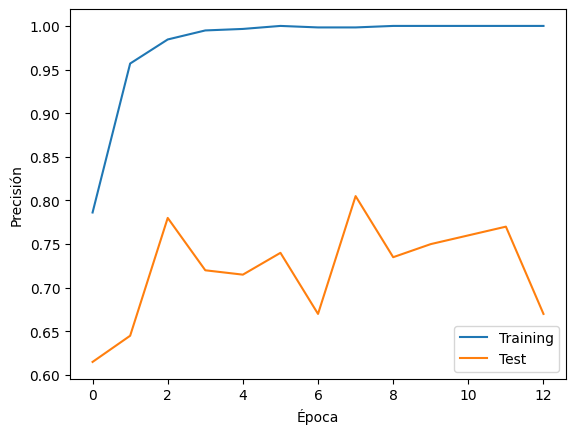

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend(['Training', 'Test'], loc='lower right')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


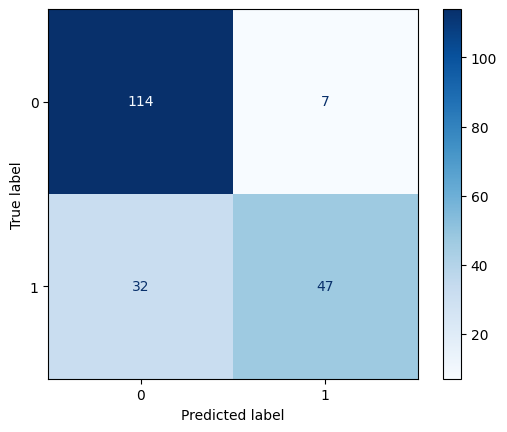

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Obtener predicciones binarias
predictions = model.predict(X_val)
predicted_classes = (predictions > 0.5).astype(int).flatten()

# Calcular la matriz de confusión
cm = confusion_matrix(y_val, predicted_classes)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


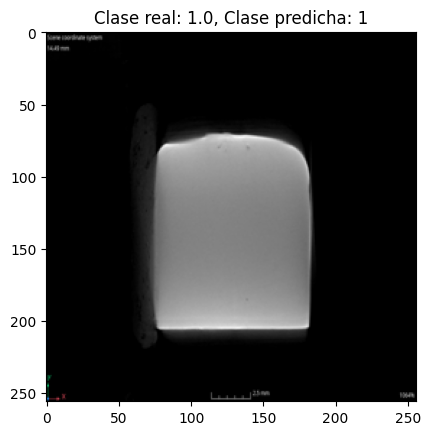

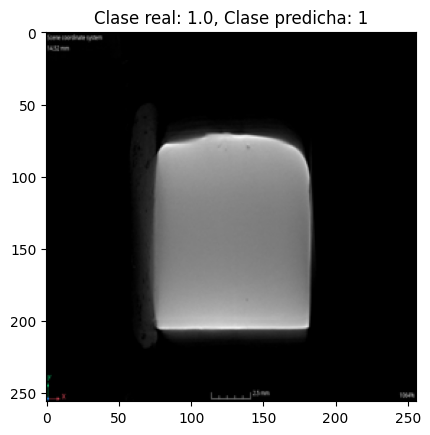

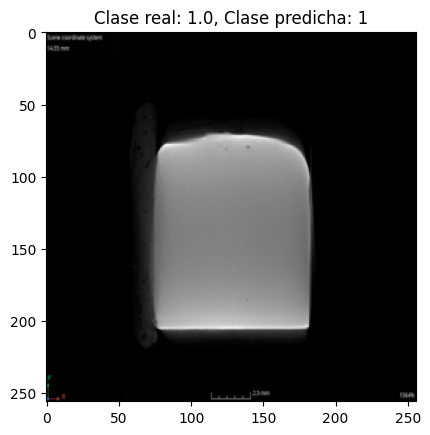

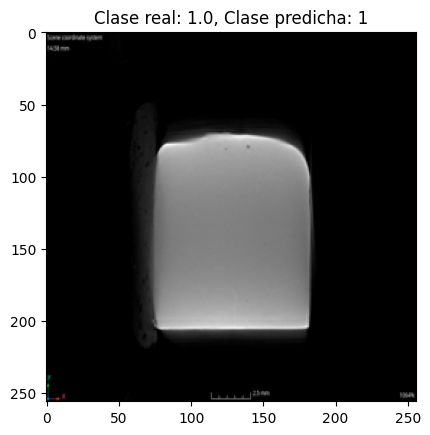

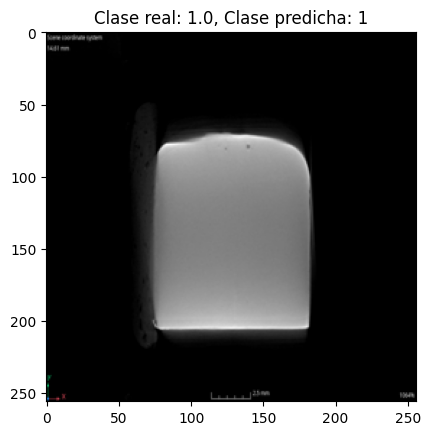

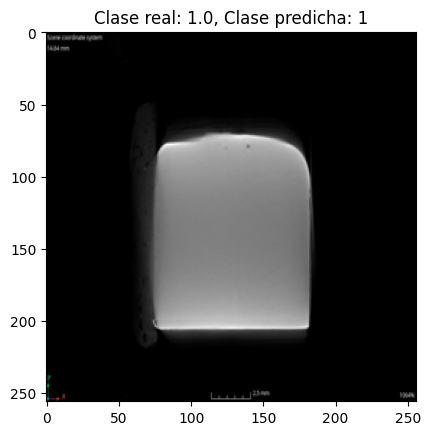

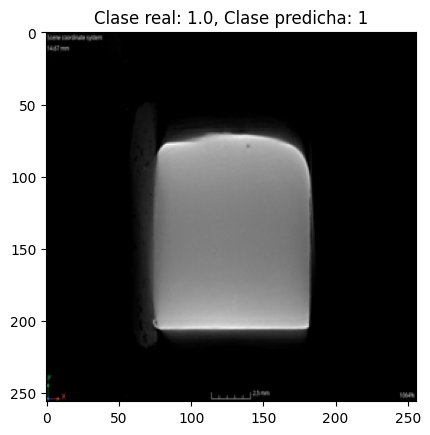

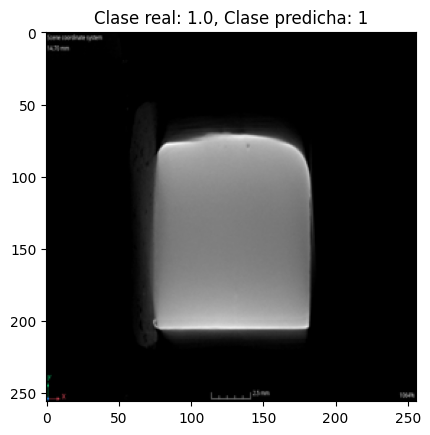

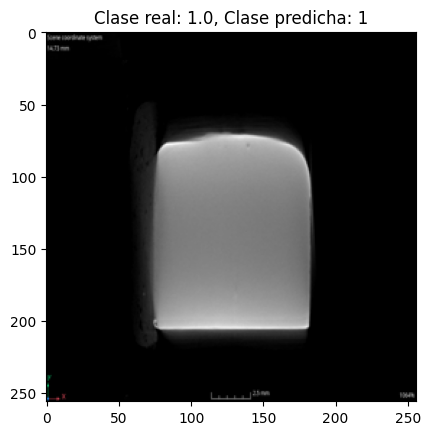

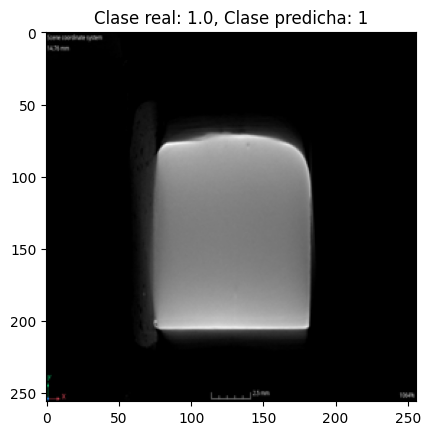

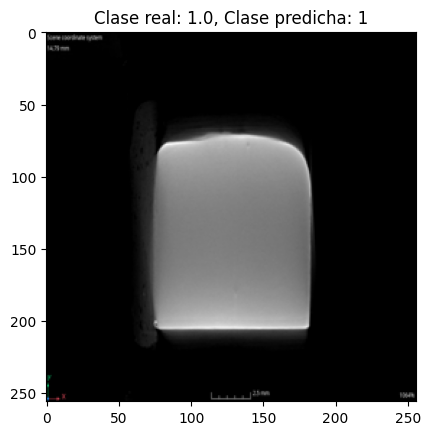

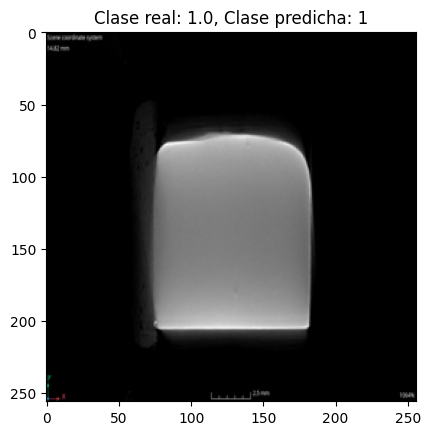

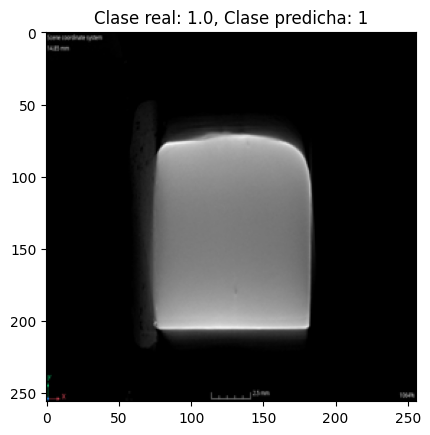

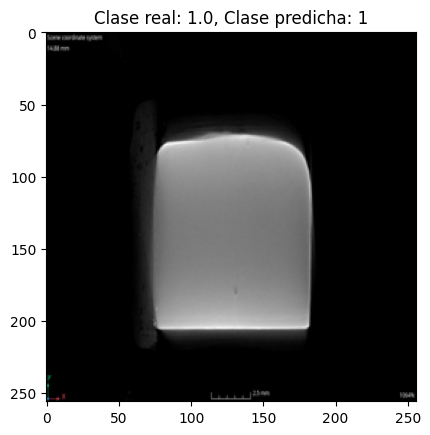

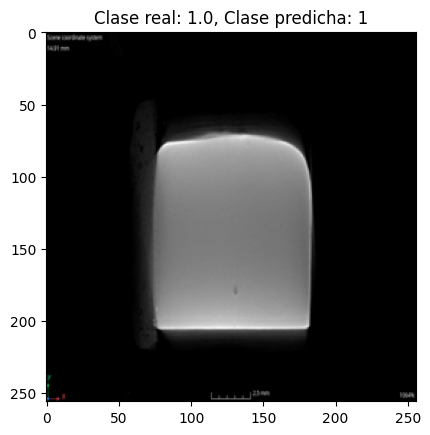

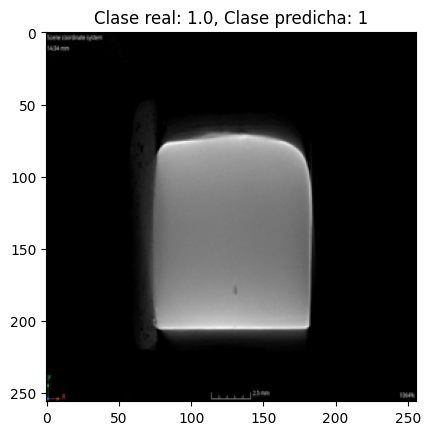

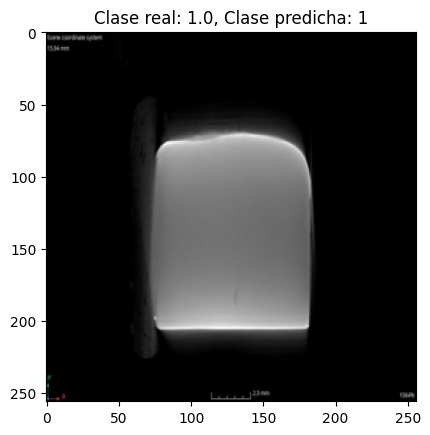

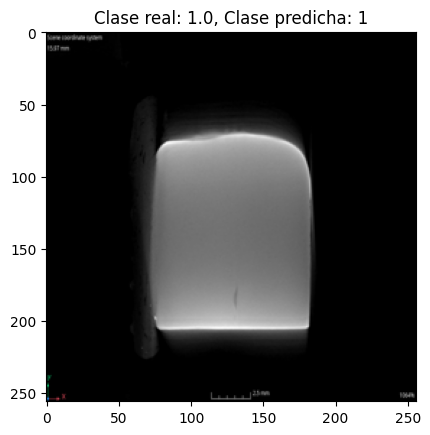

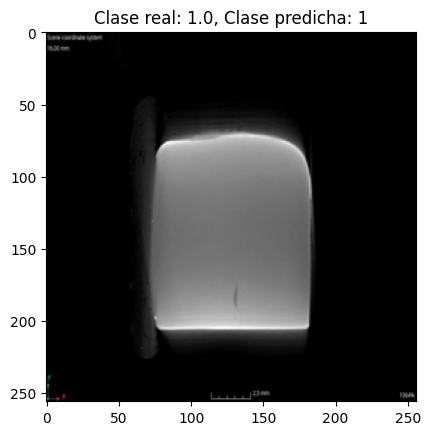

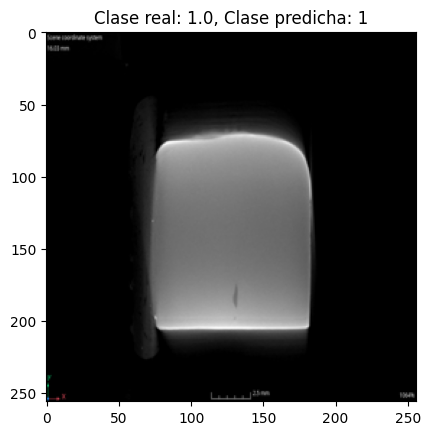

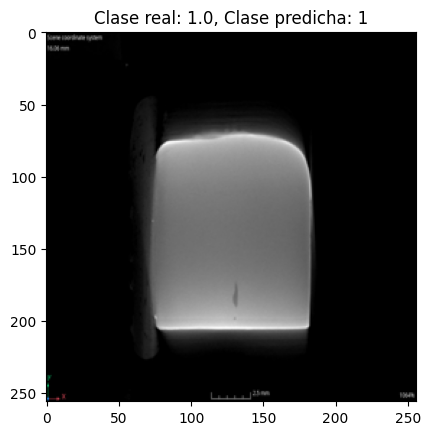

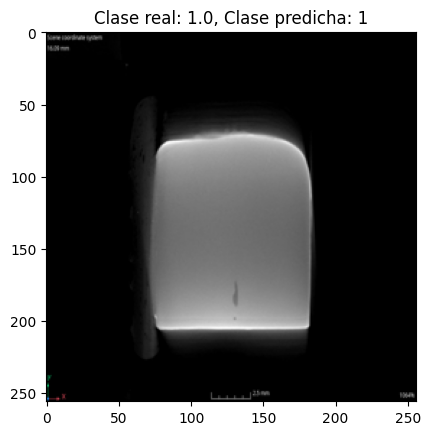

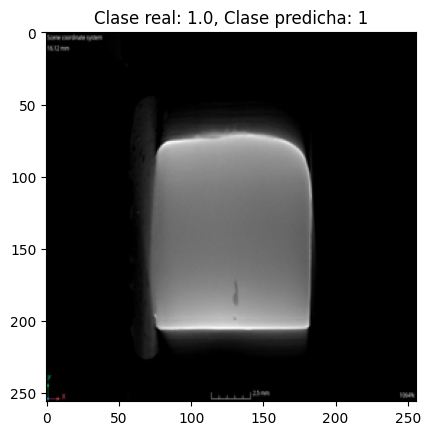

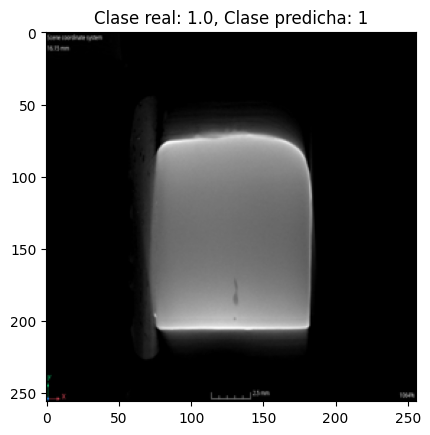

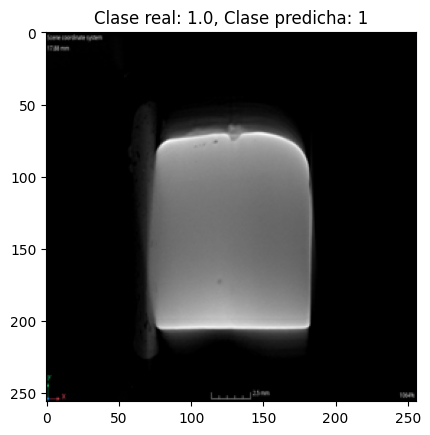

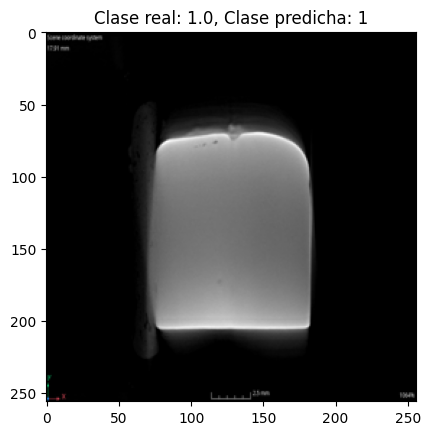

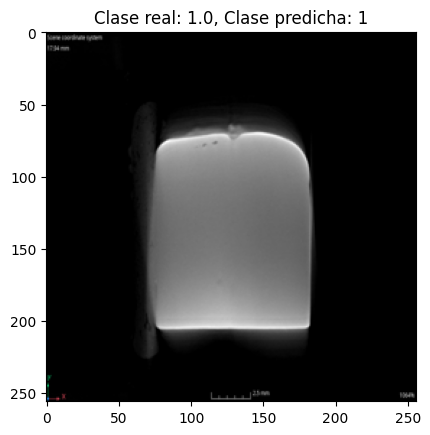

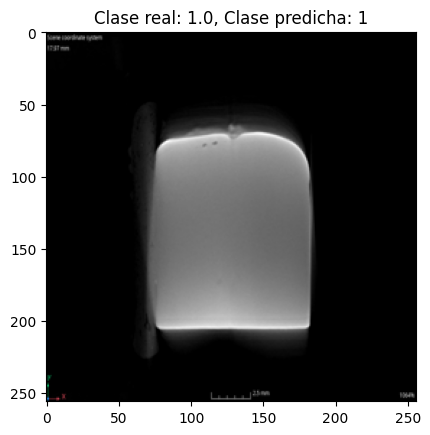

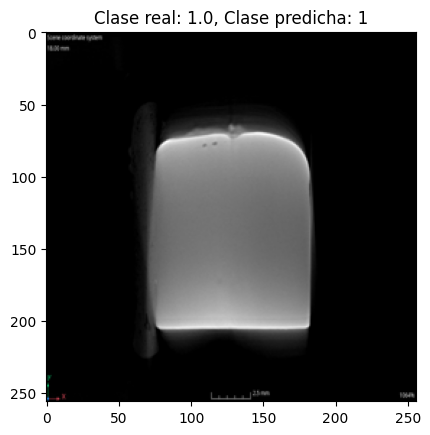

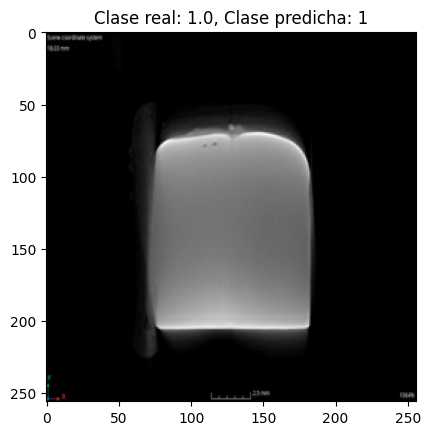

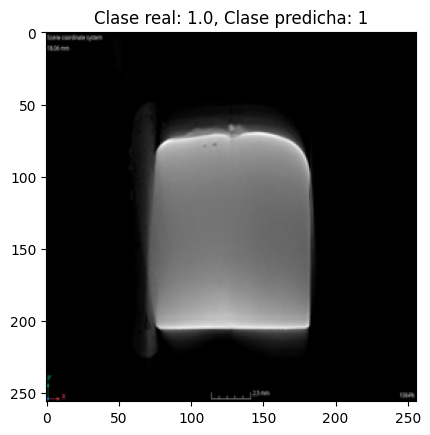

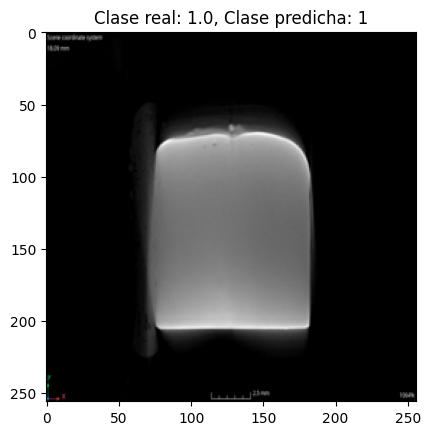

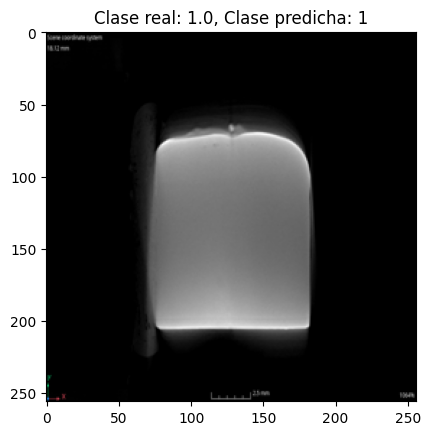

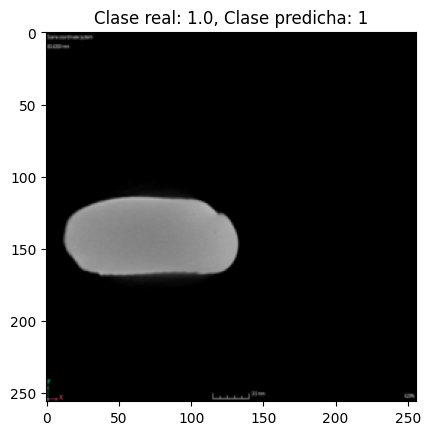

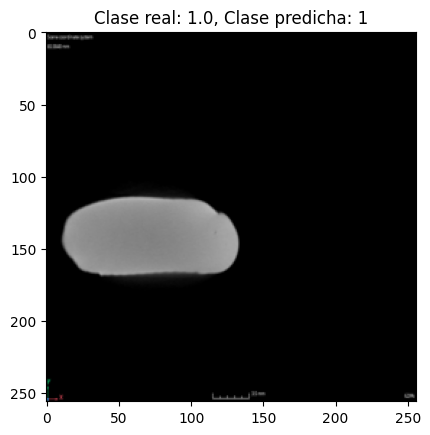

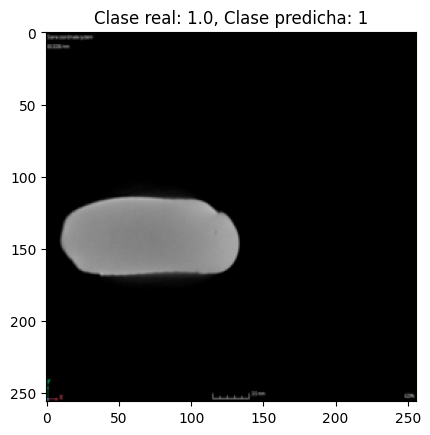

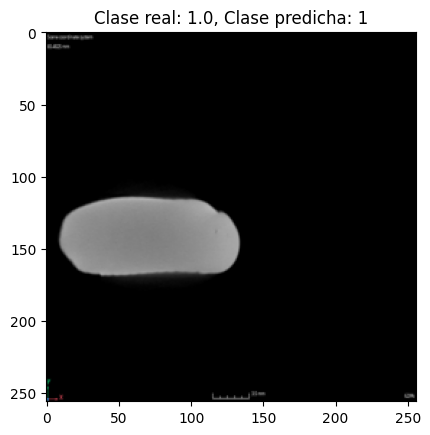

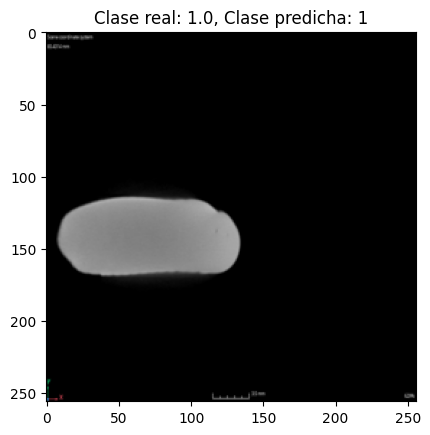

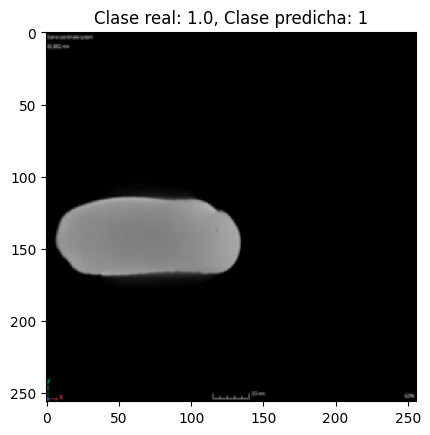

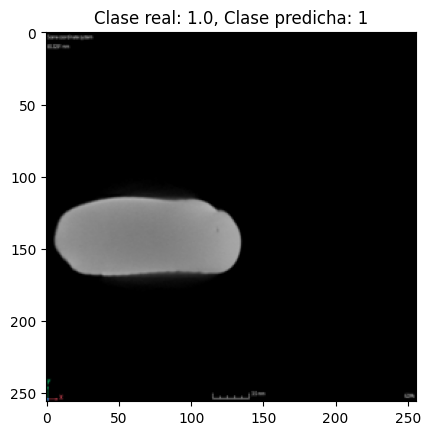

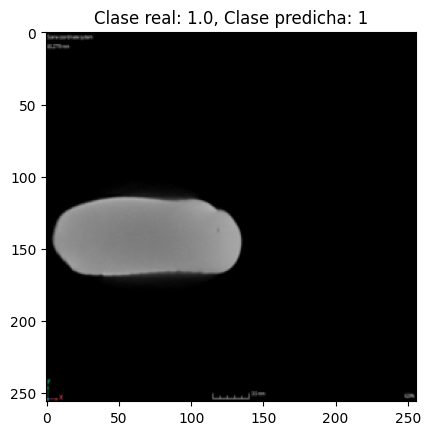

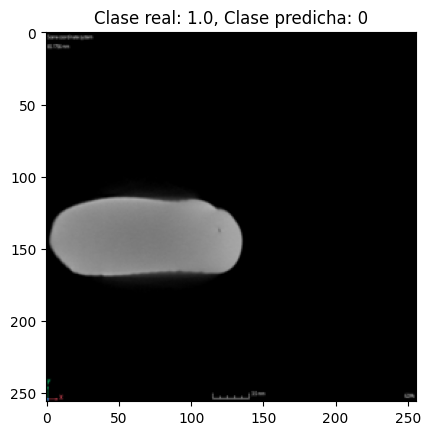

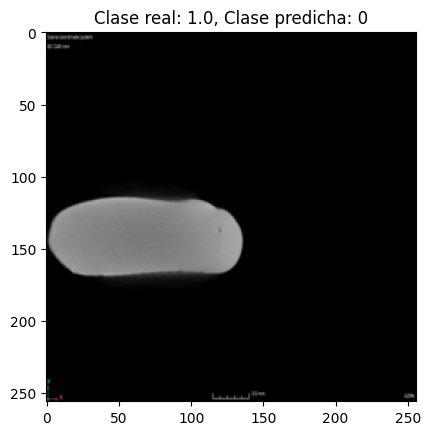

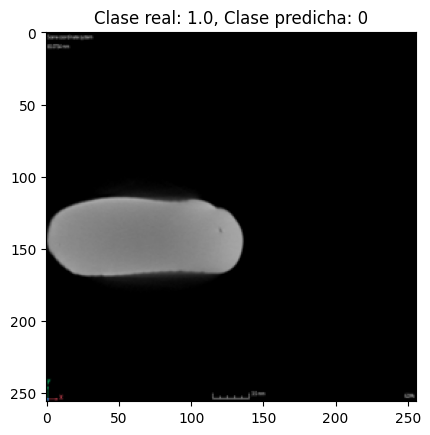

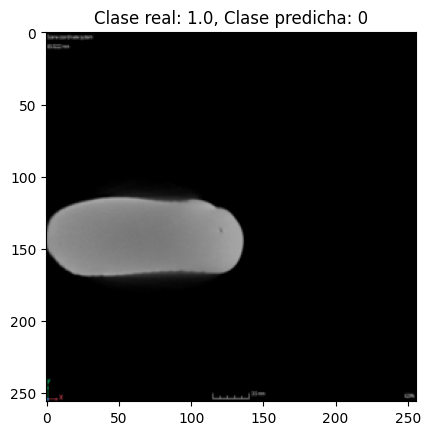

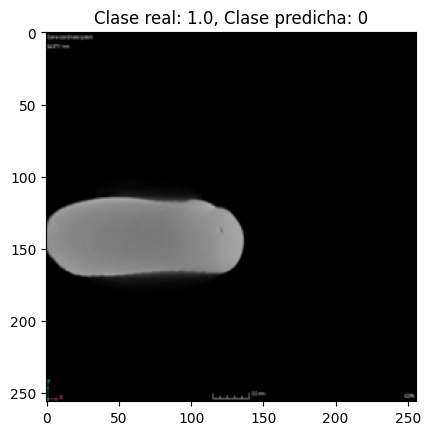

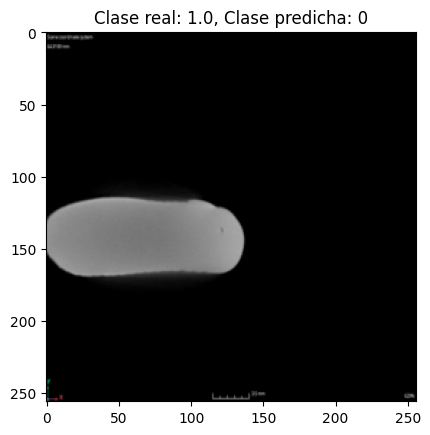

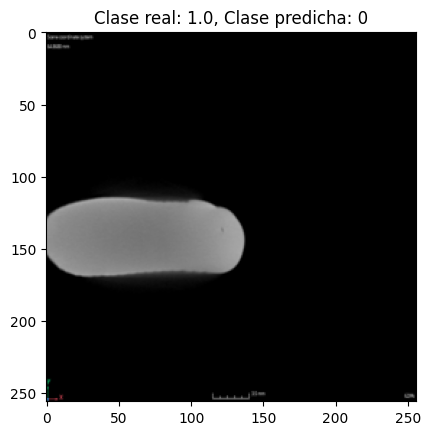

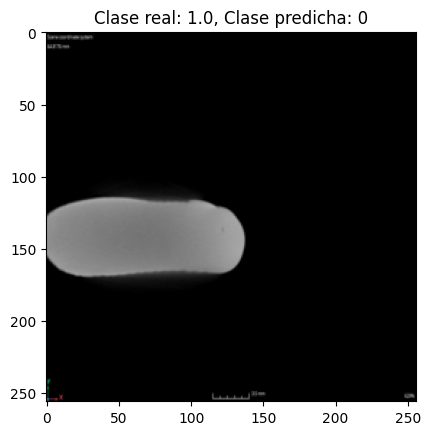

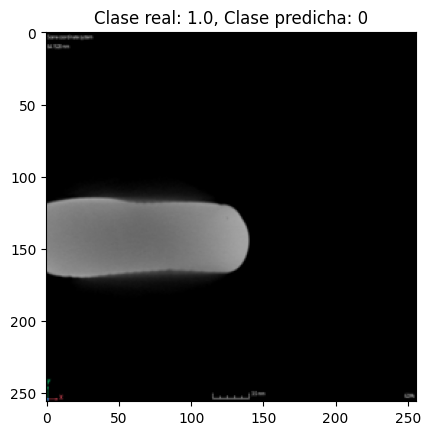

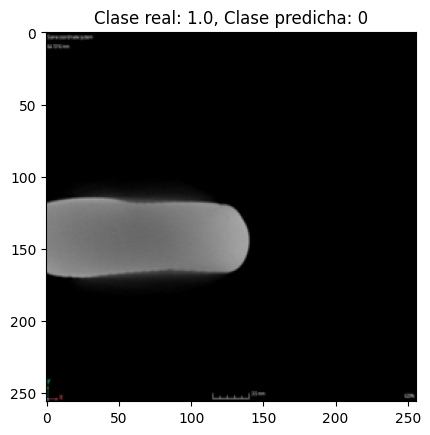

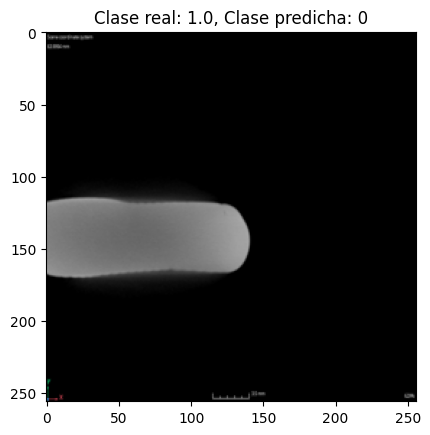

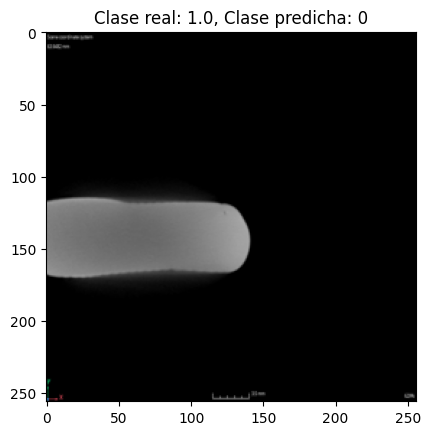

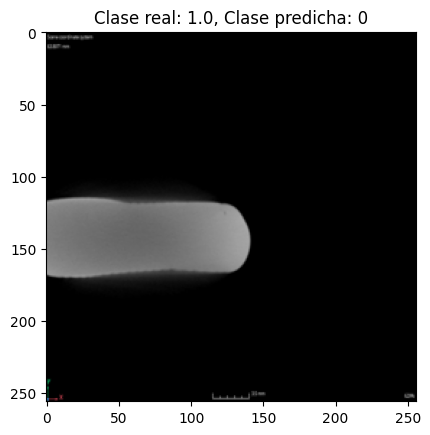

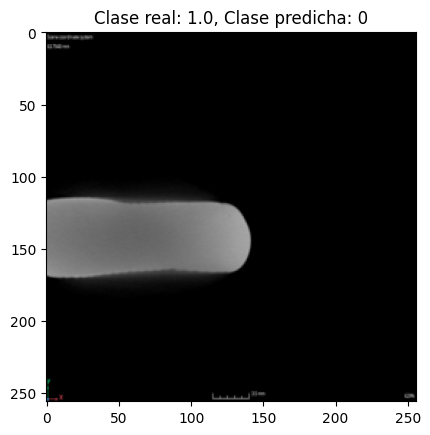

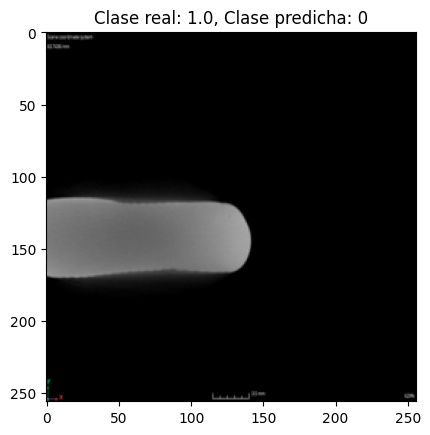

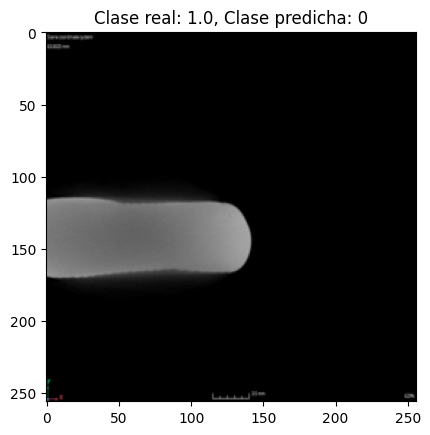

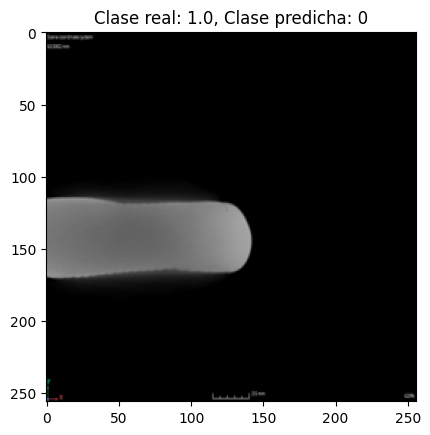

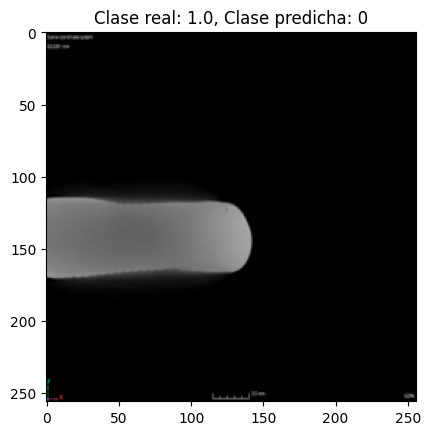

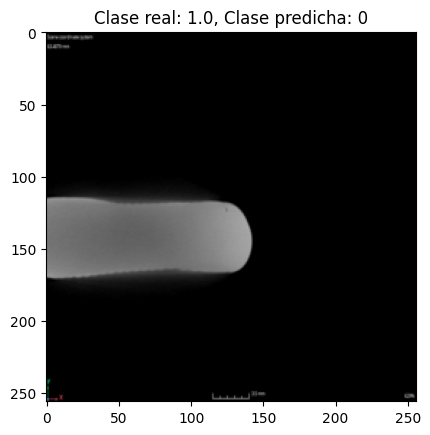

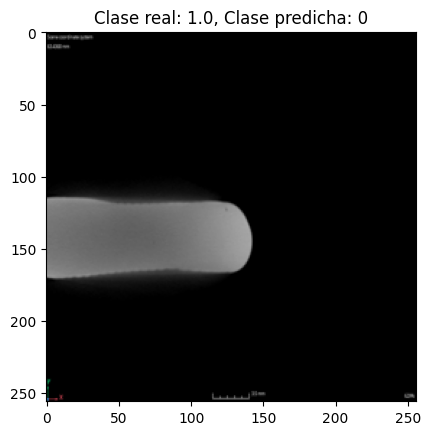

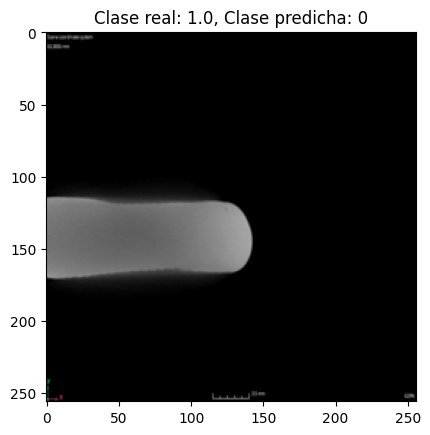

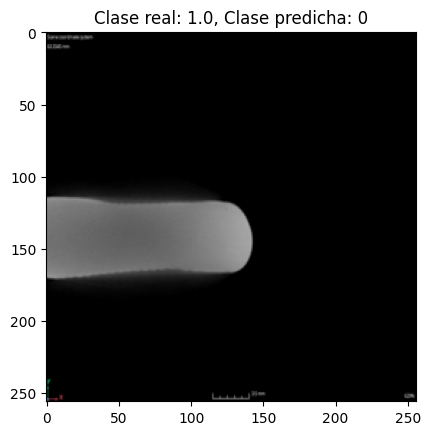

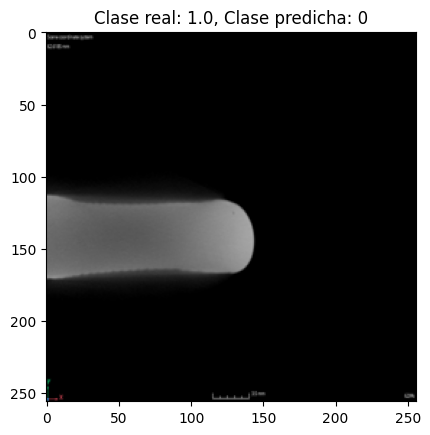

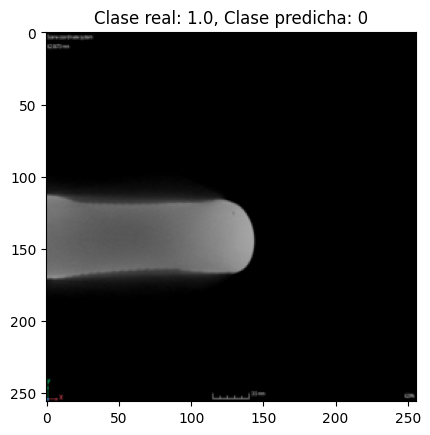

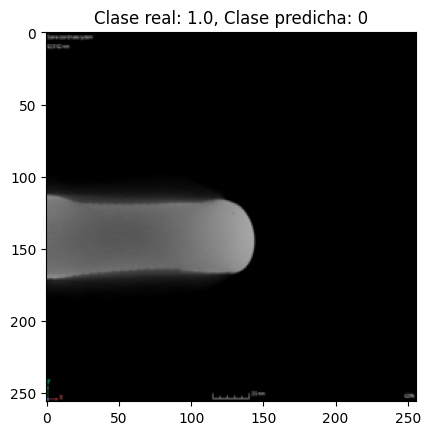

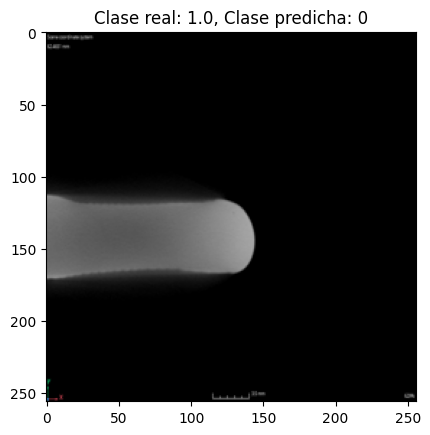

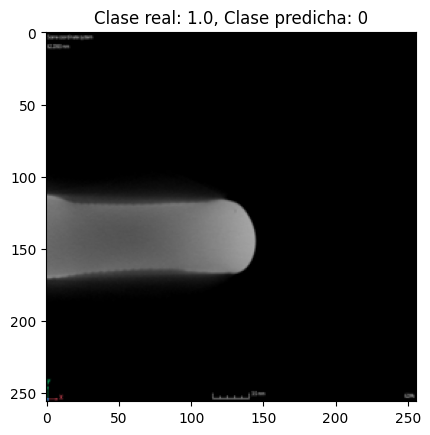

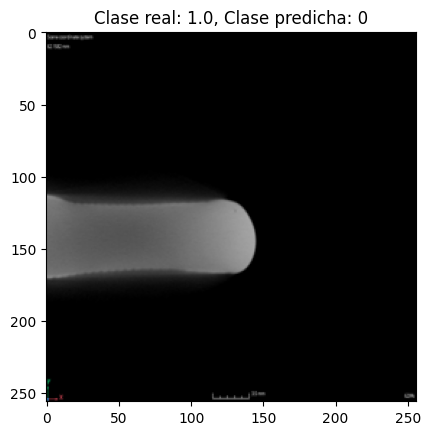

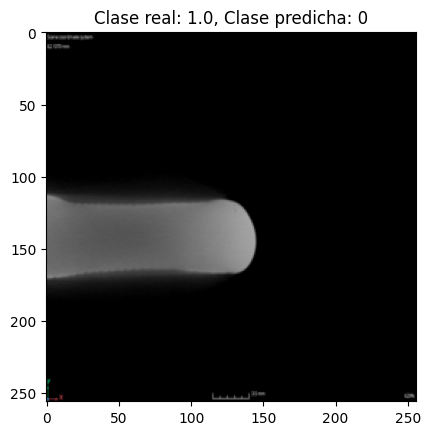

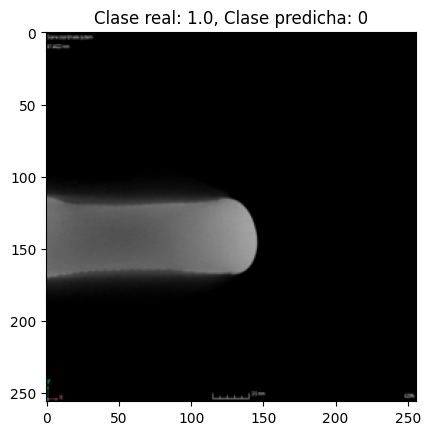

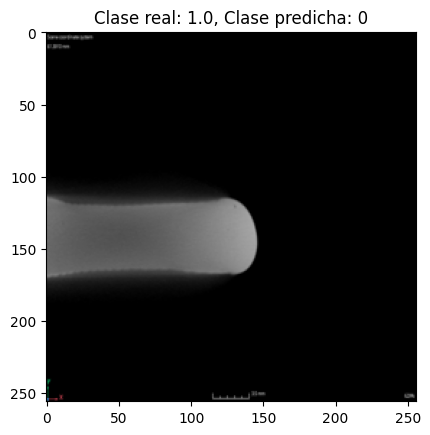

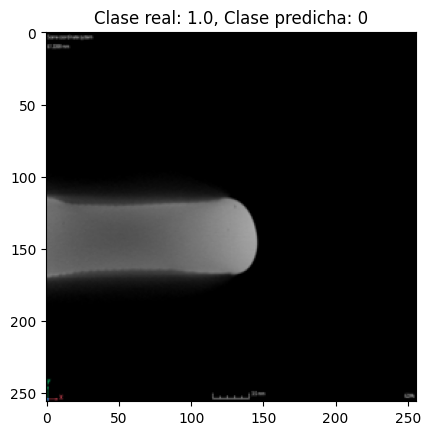

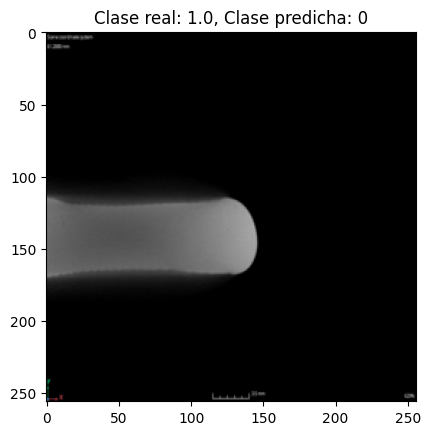

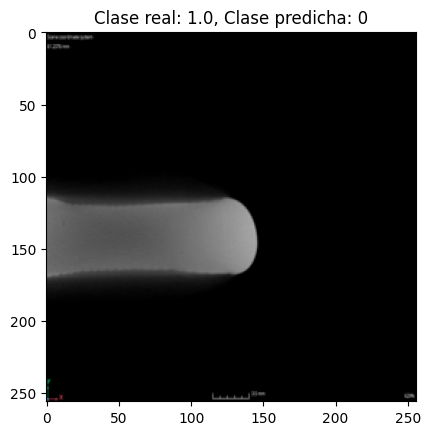

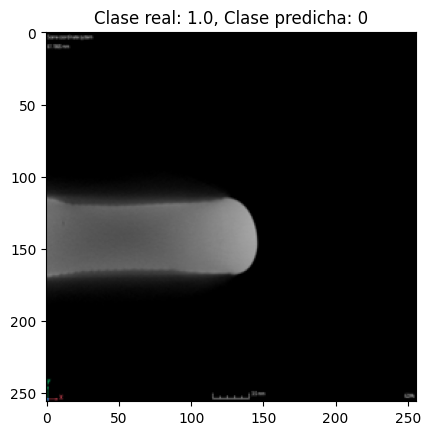

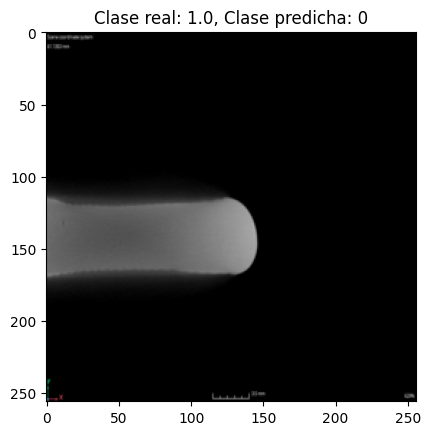

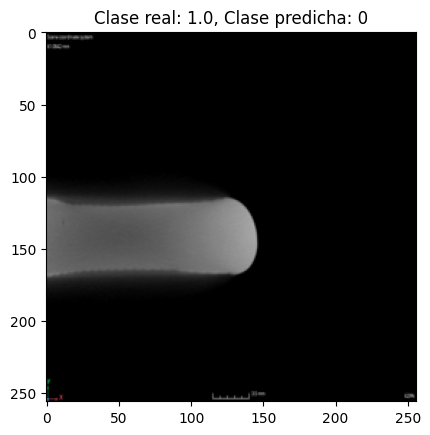

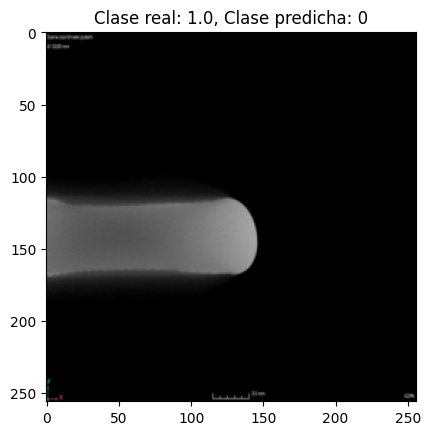

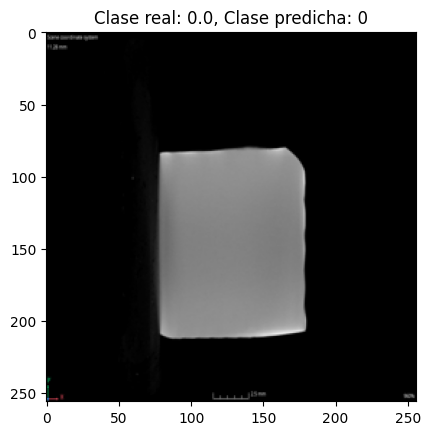

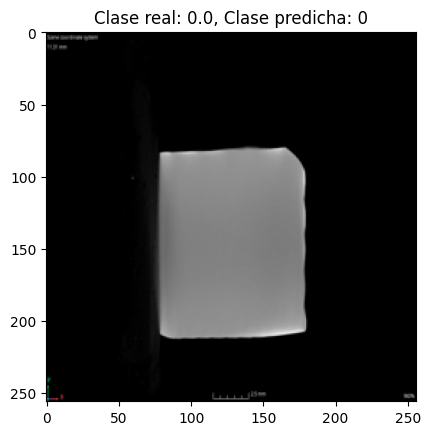

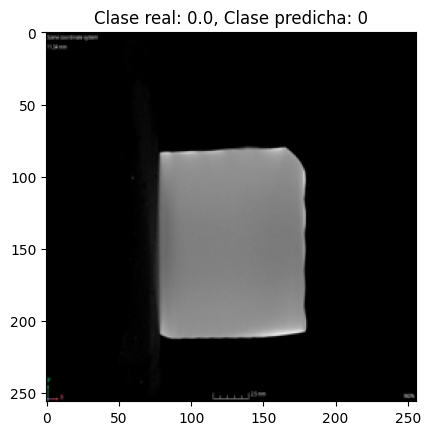

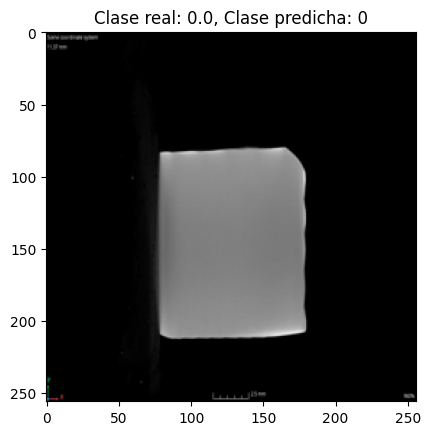

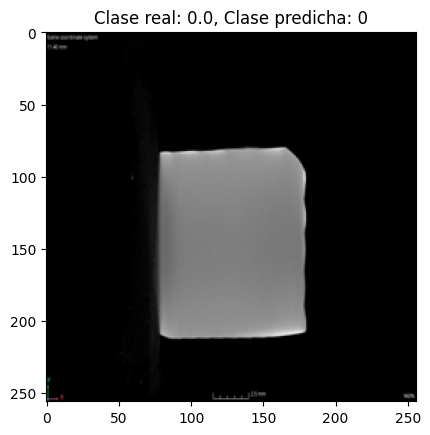

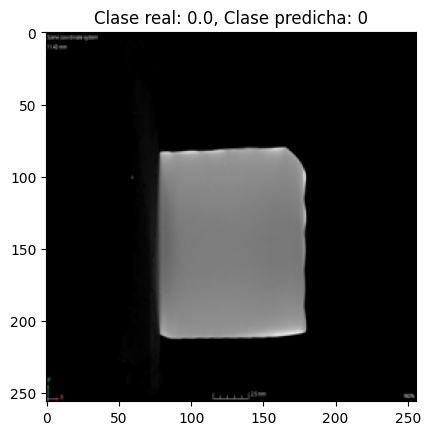

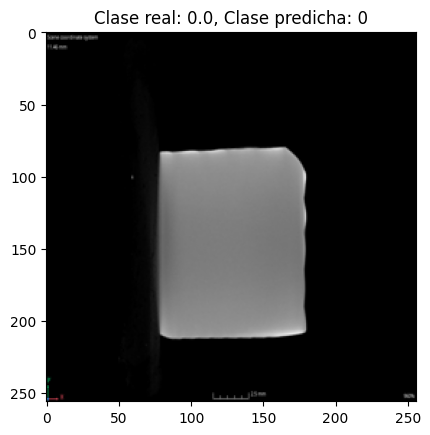

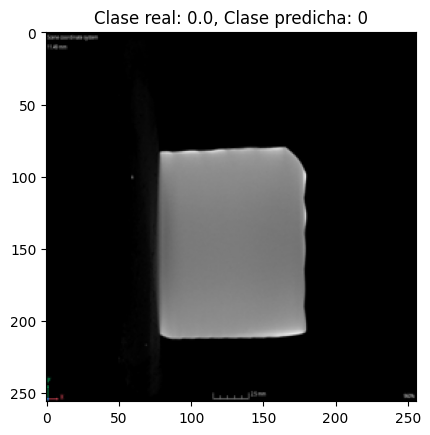

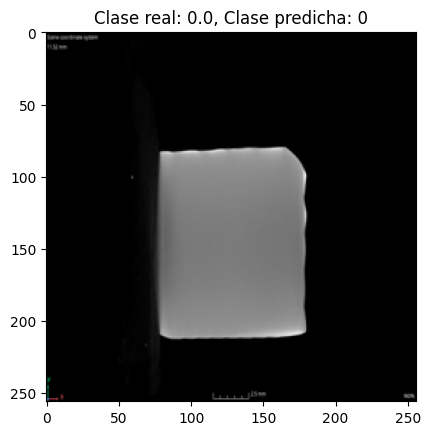

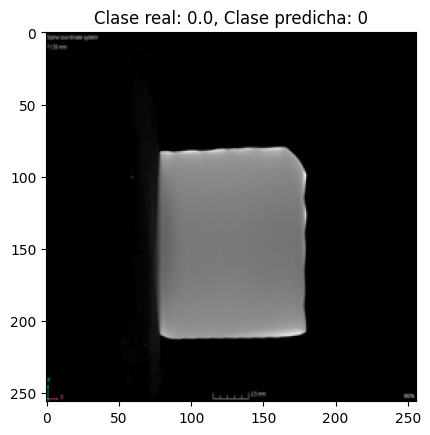

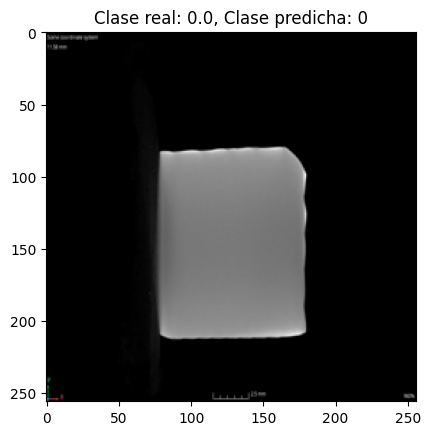

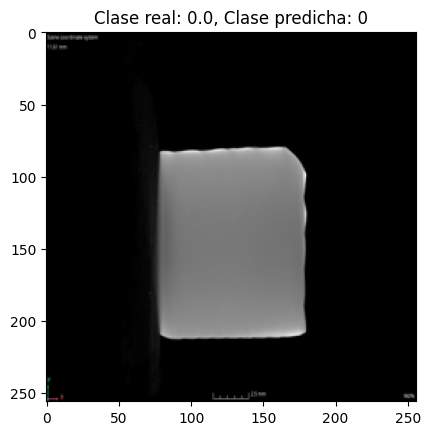

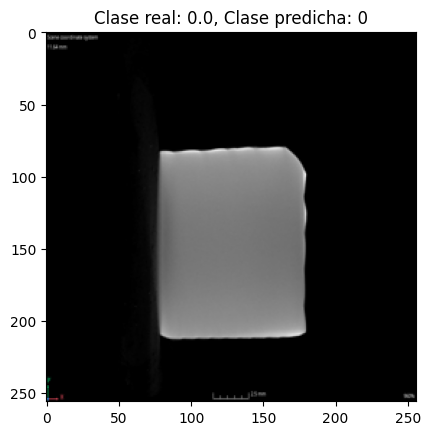

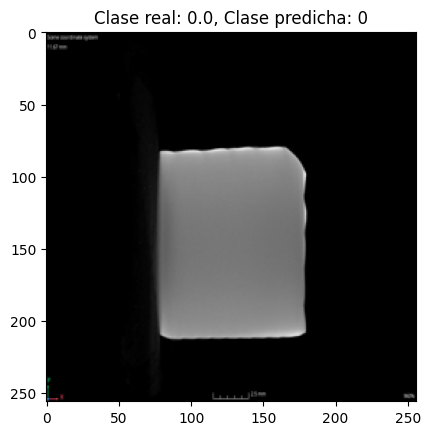

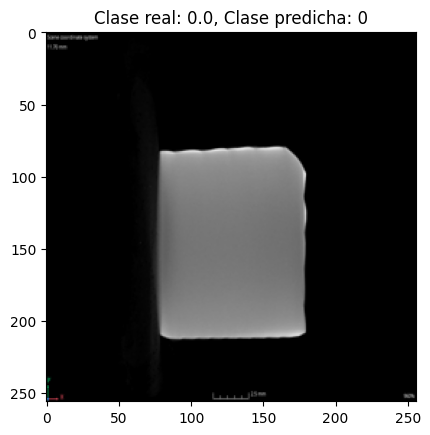

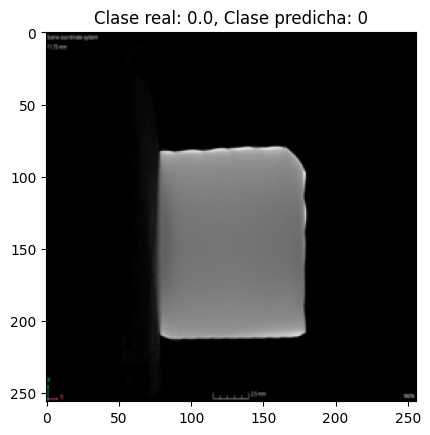

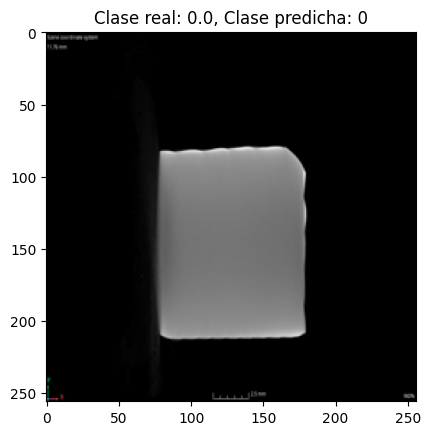

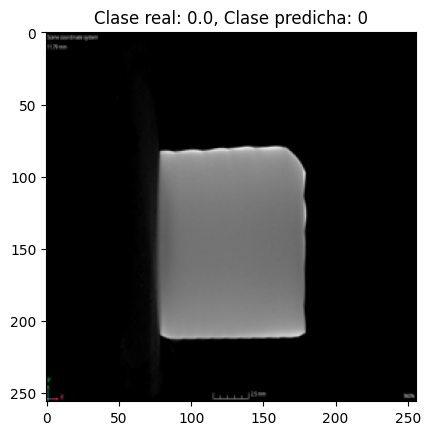

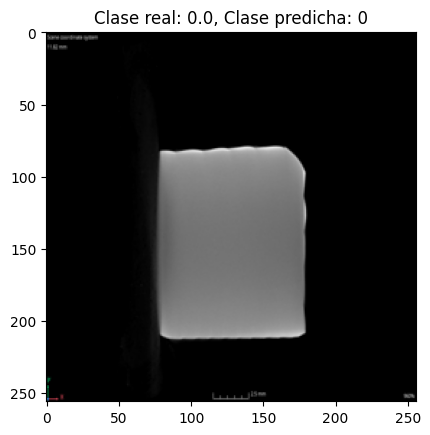

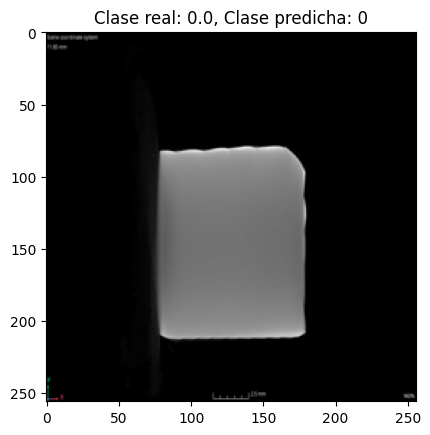

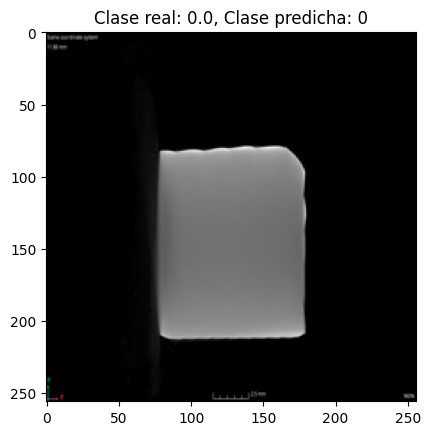

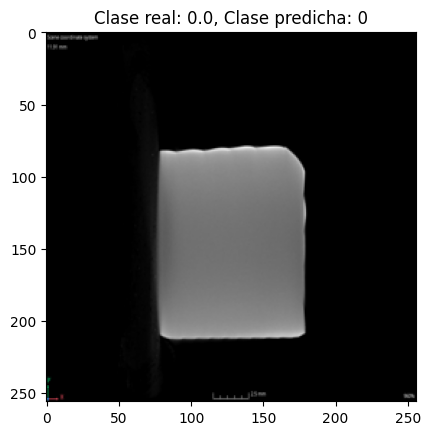

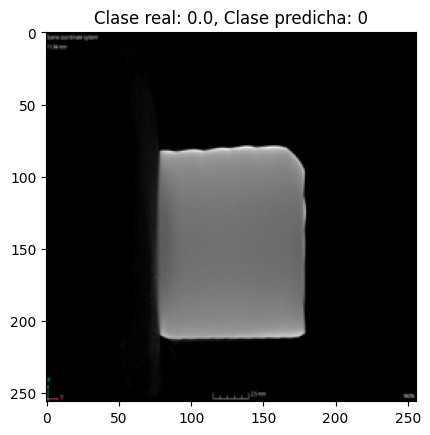

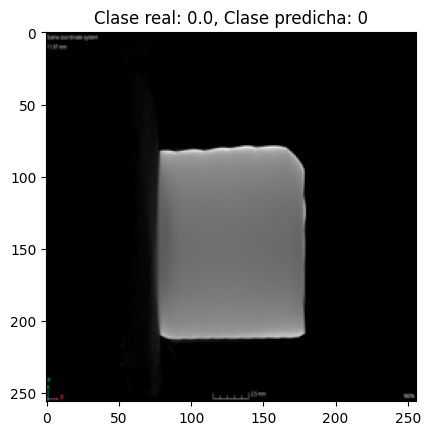

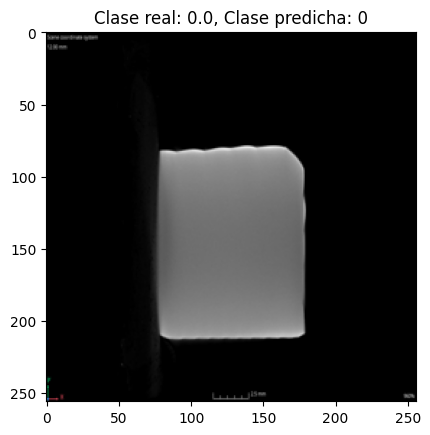

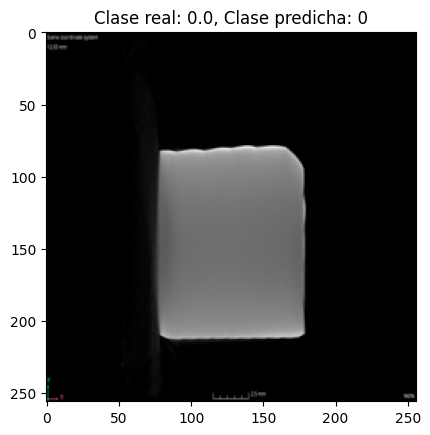

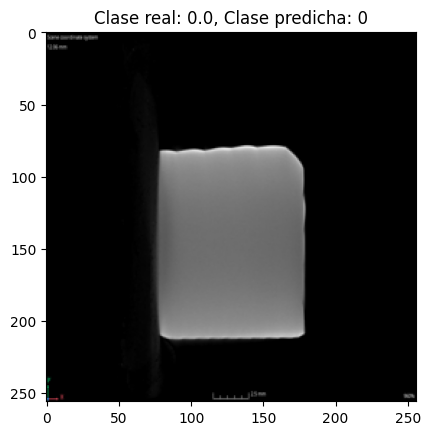

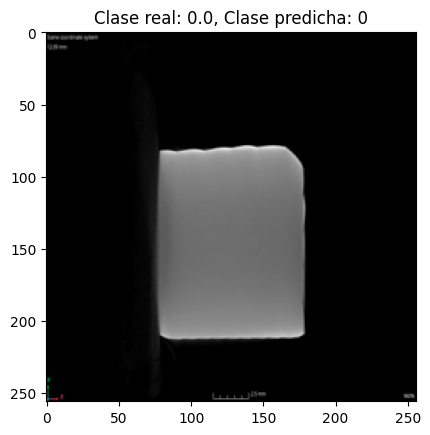

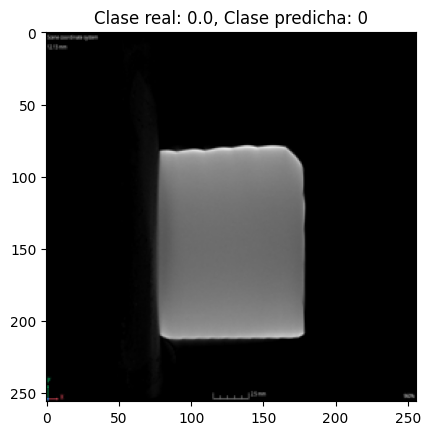

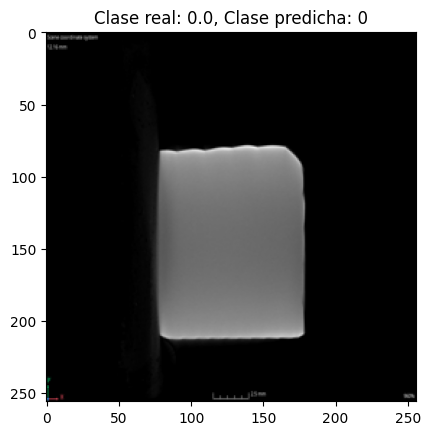

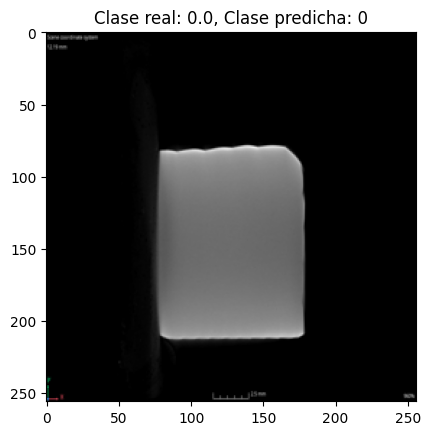

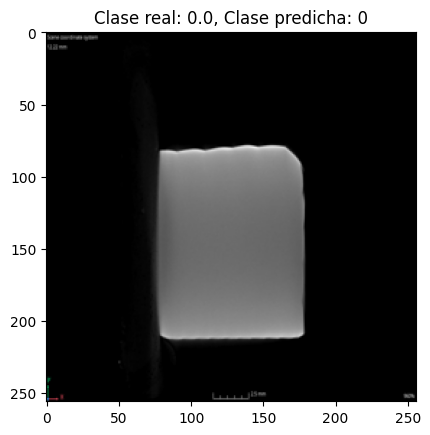

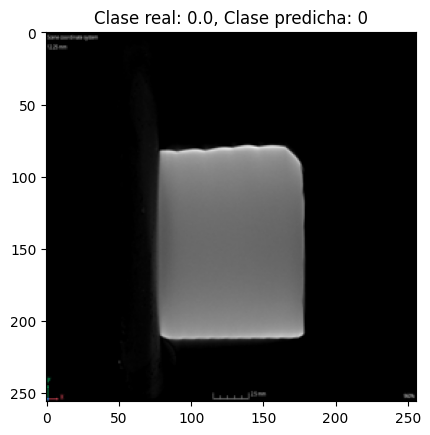

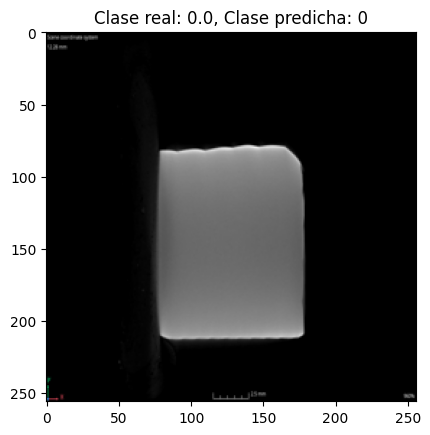

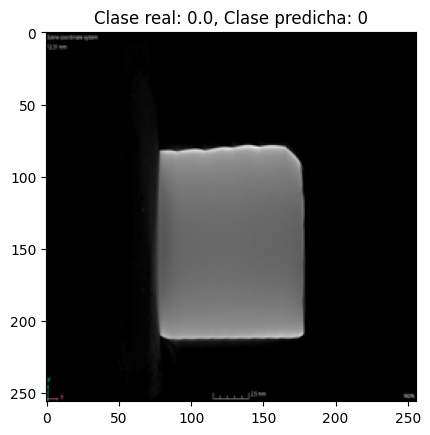

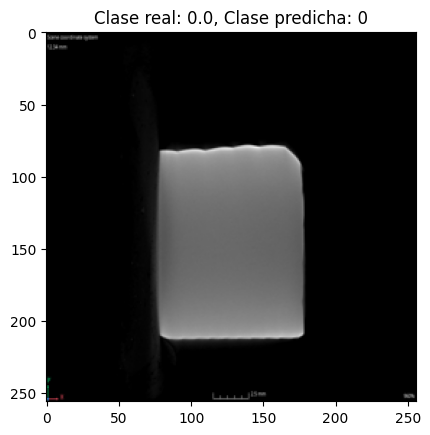

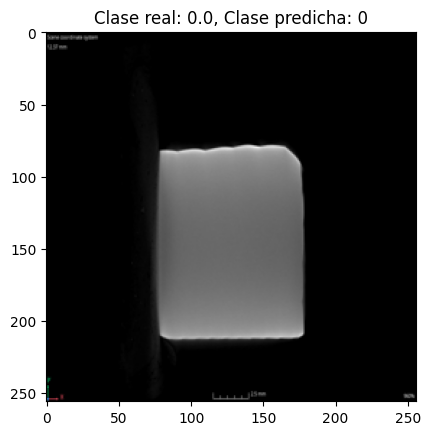

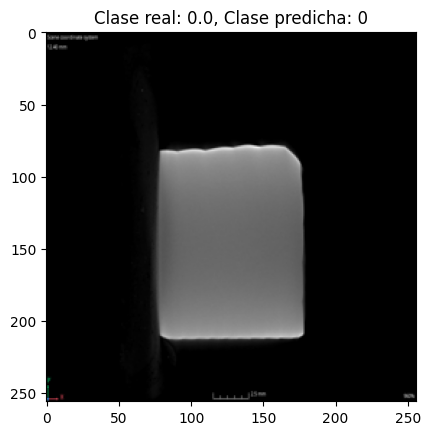

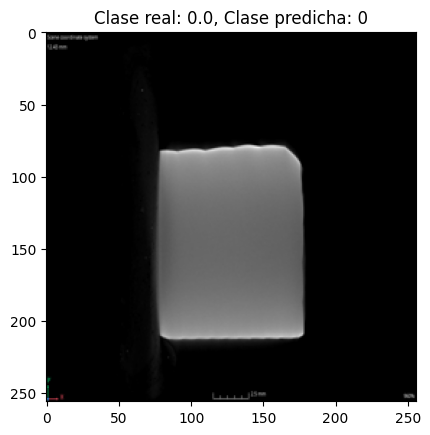

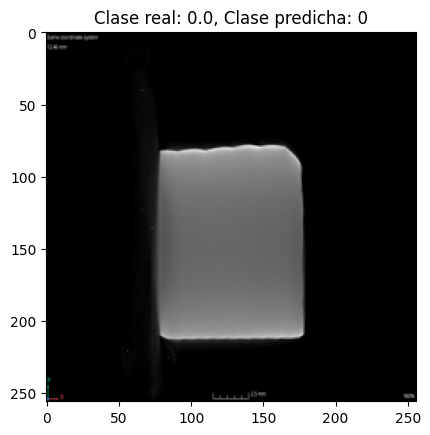

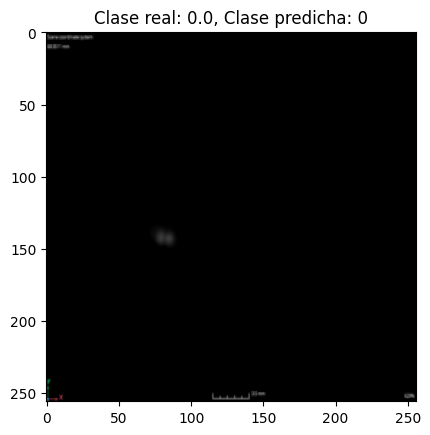

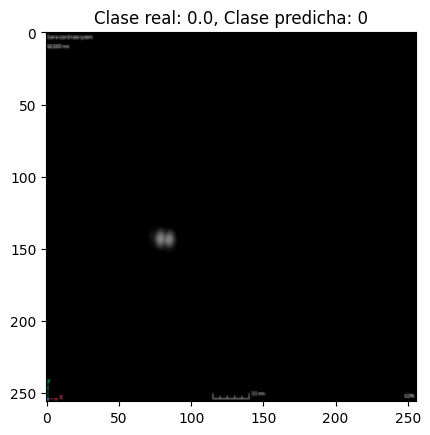

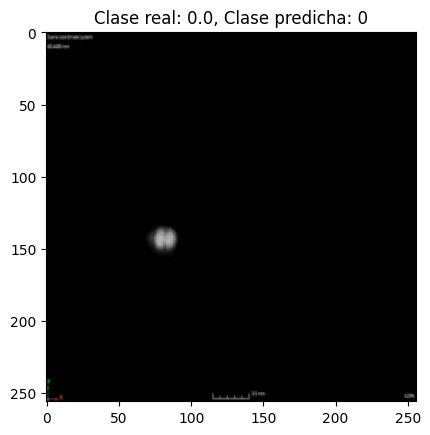

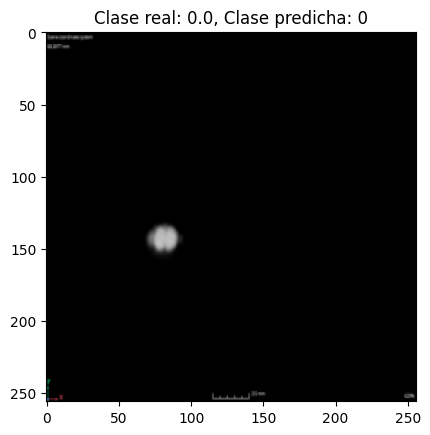

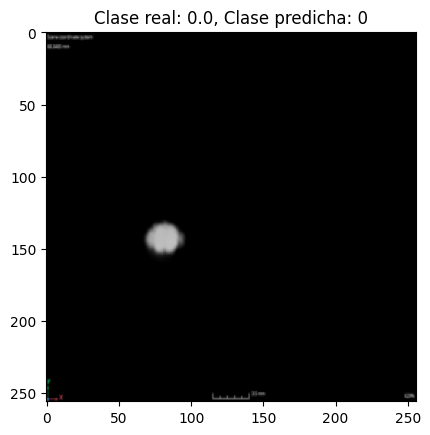

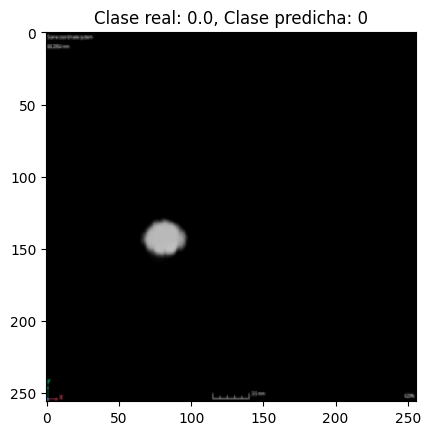

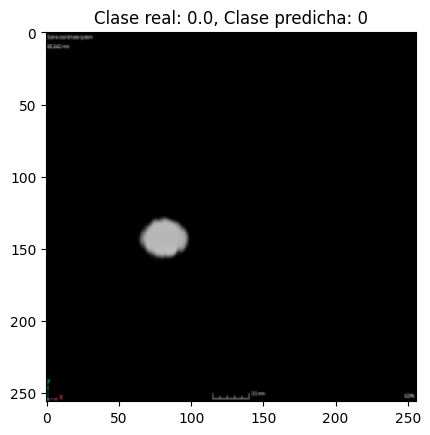

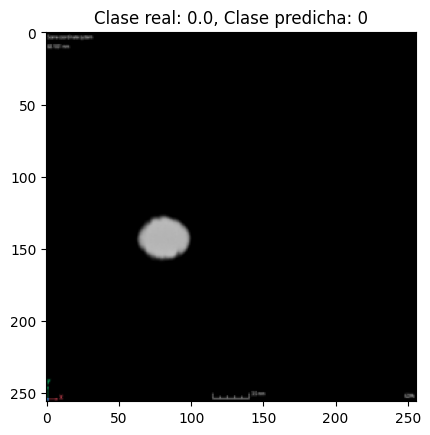

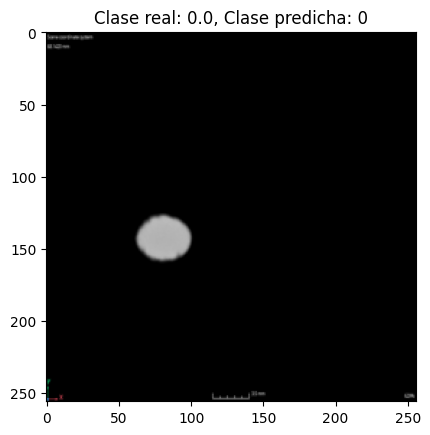

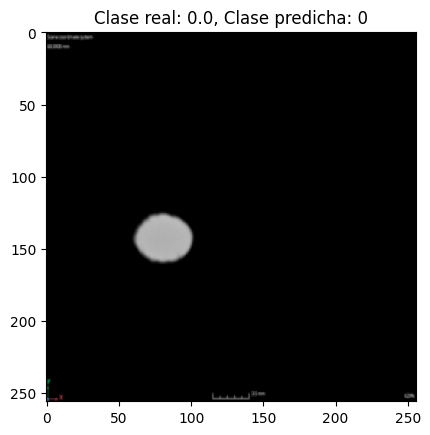

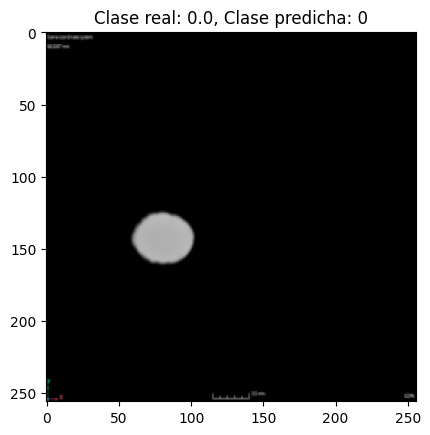

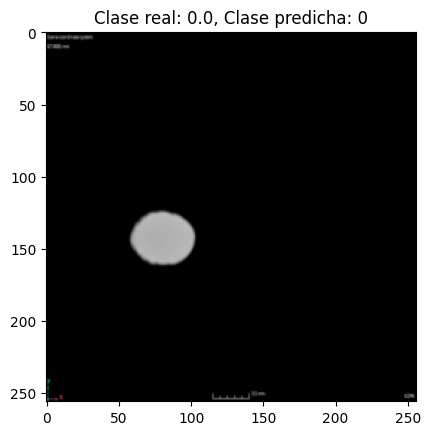

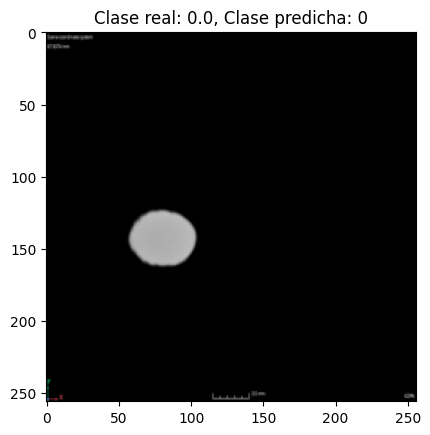

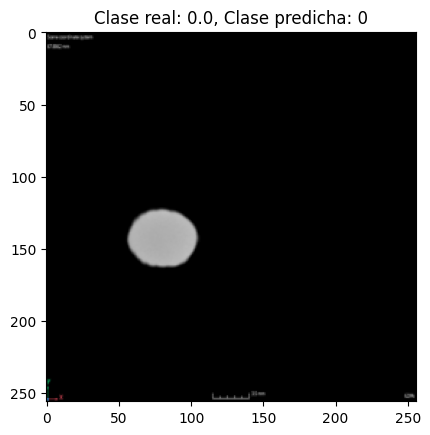

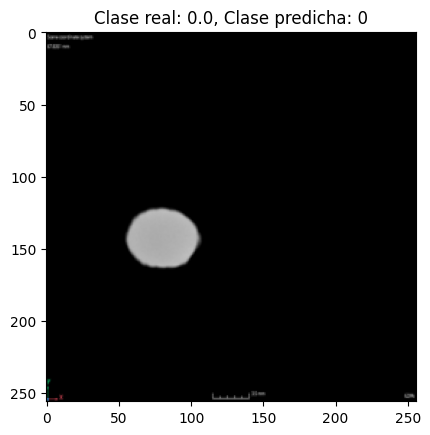

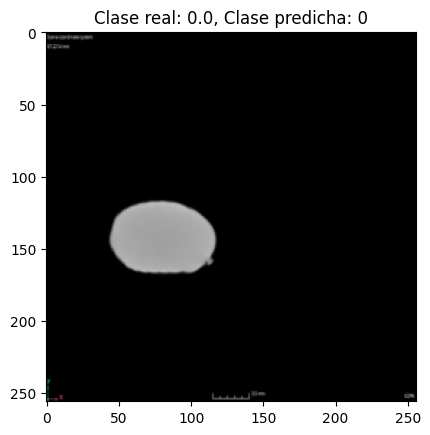

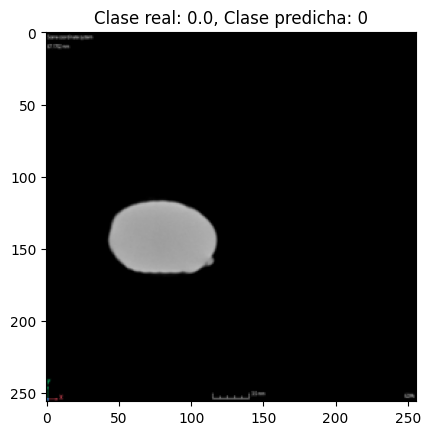

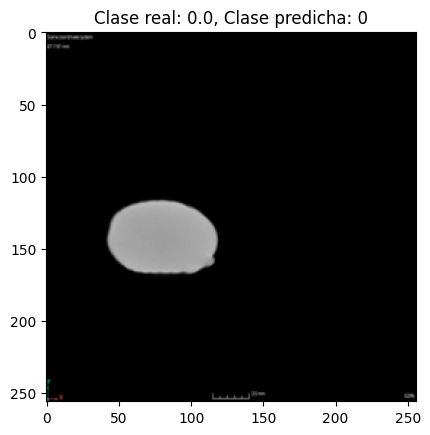

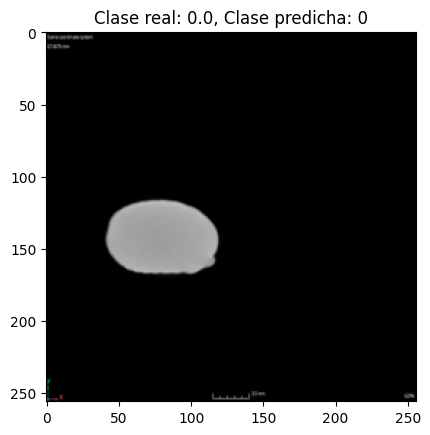

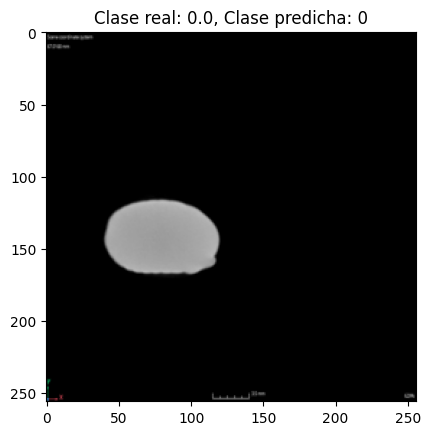

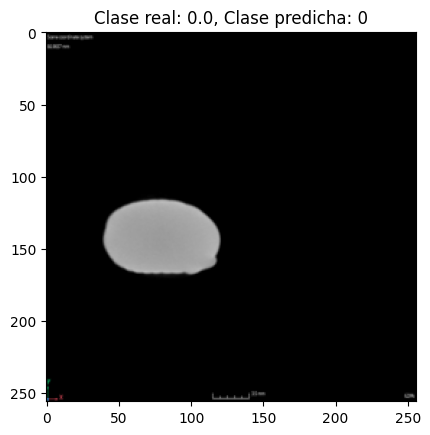

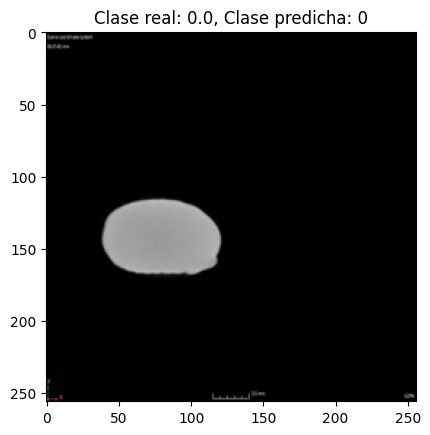

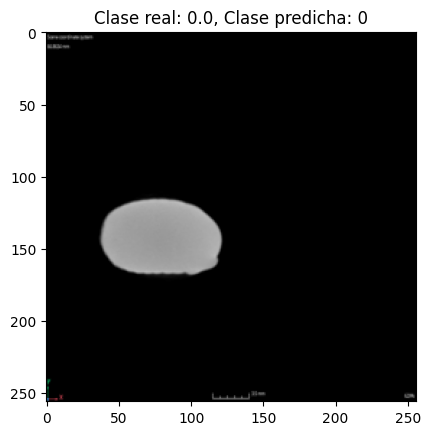

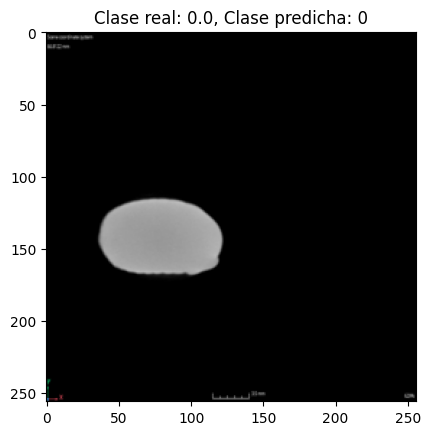

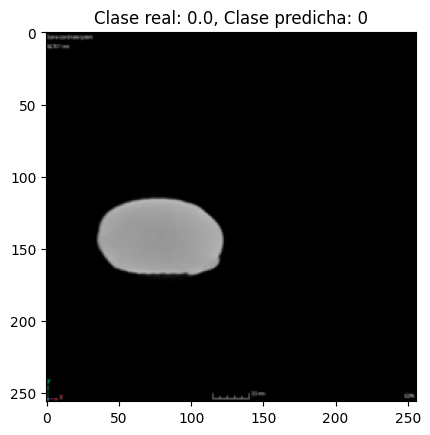

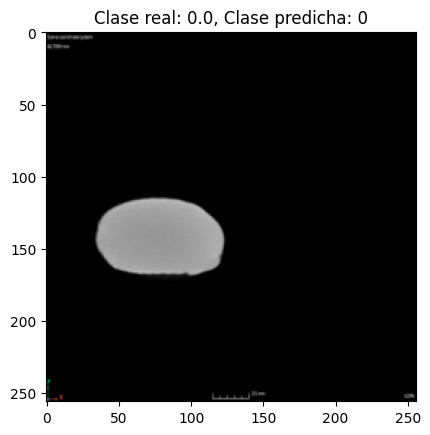

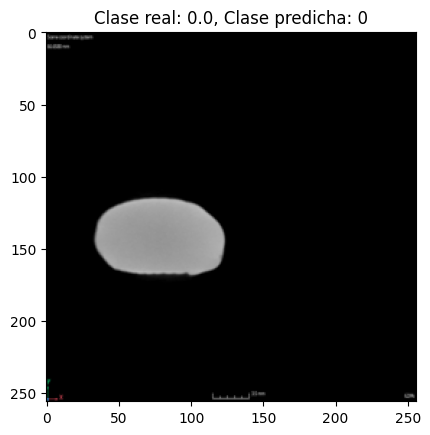

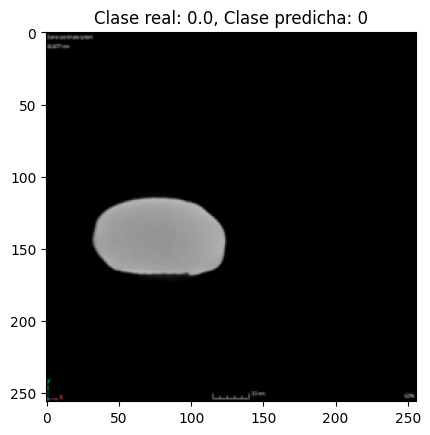

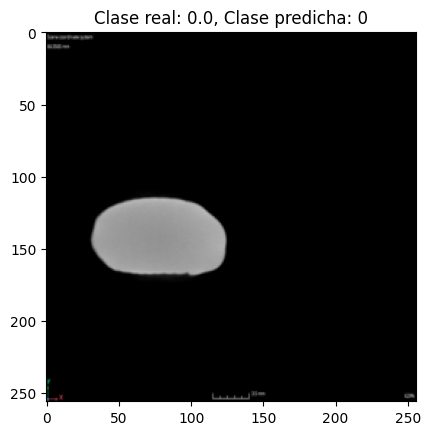

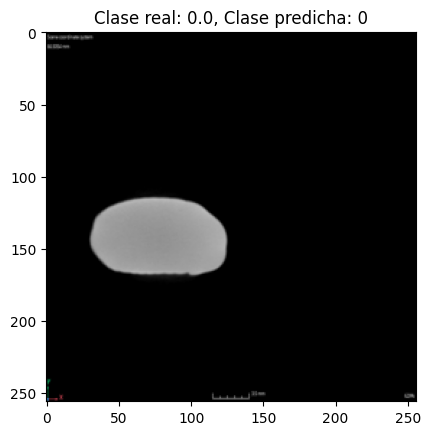

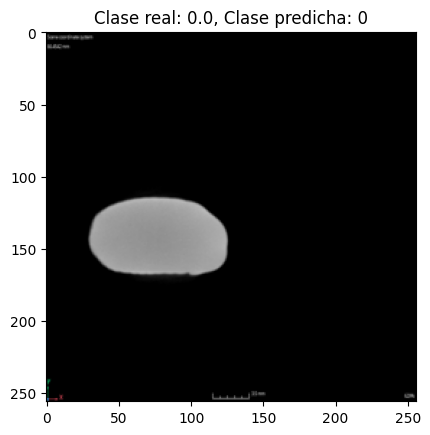

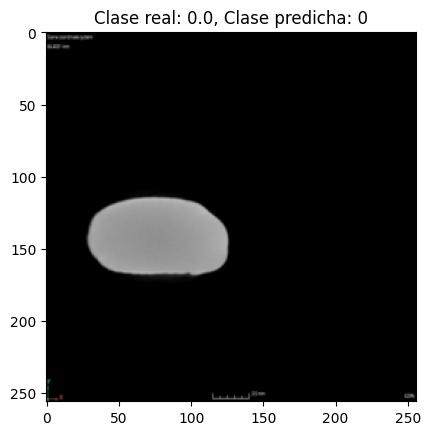

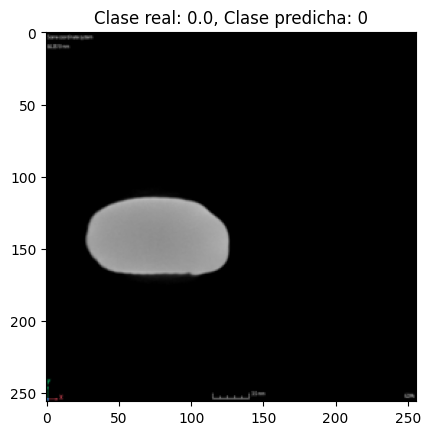

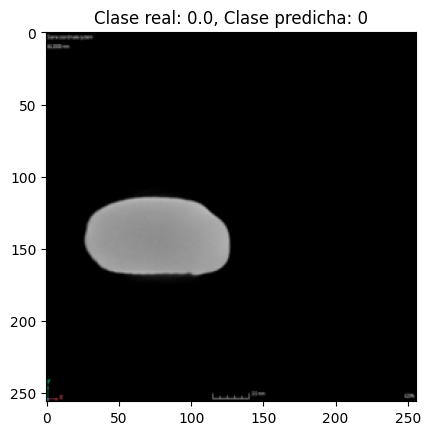

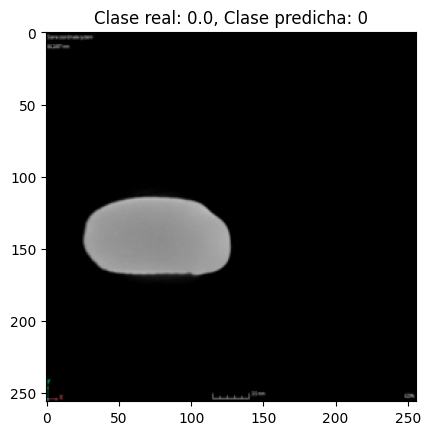

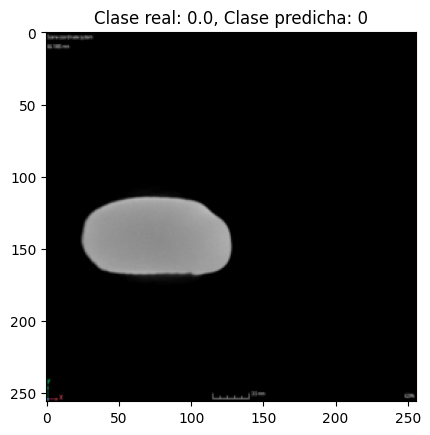

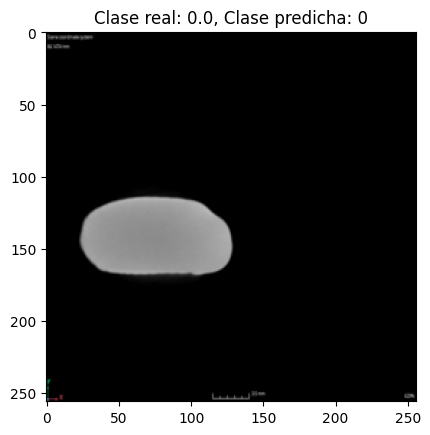

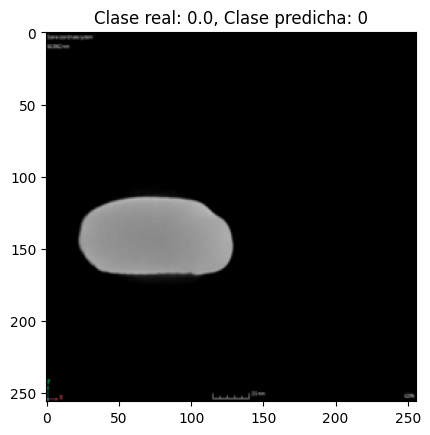

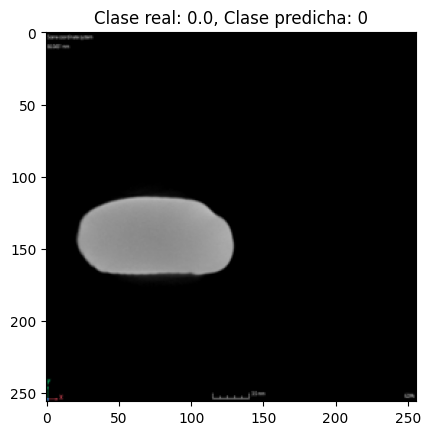

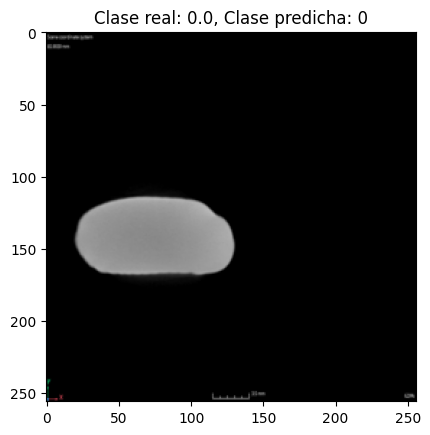

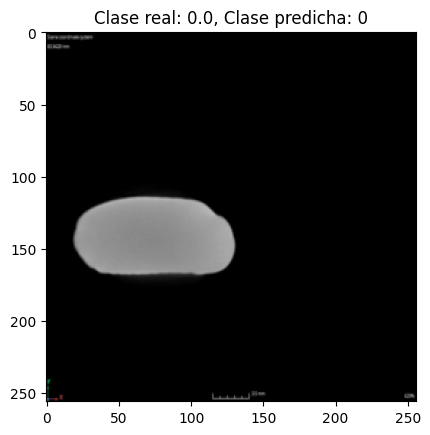

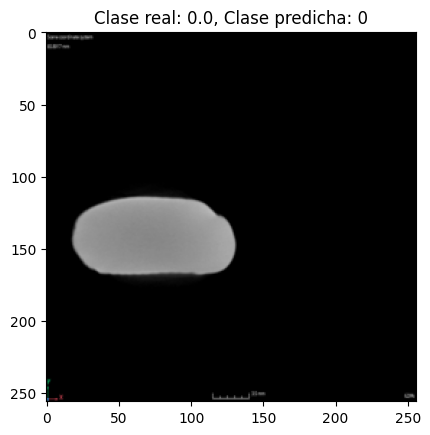

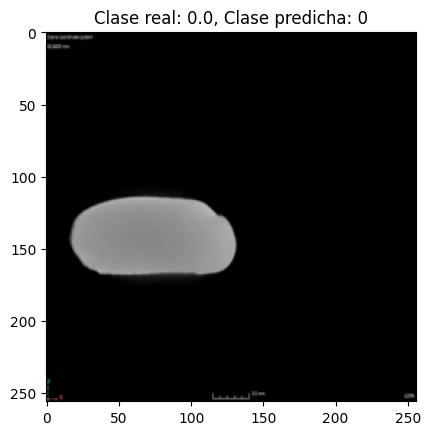

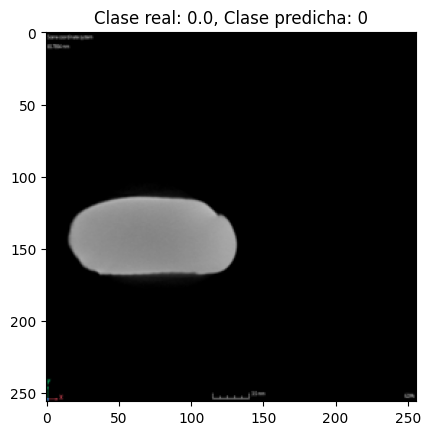

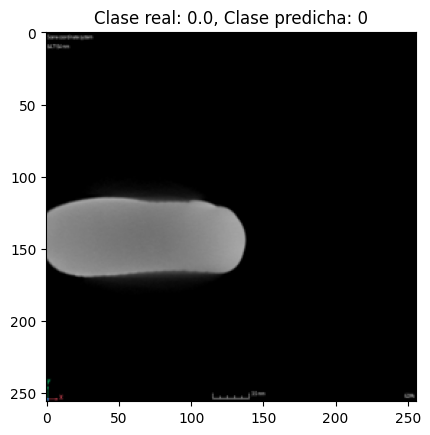

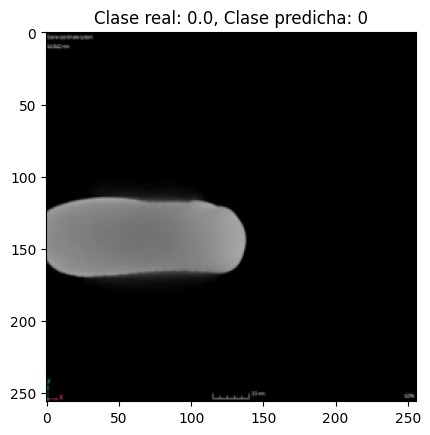

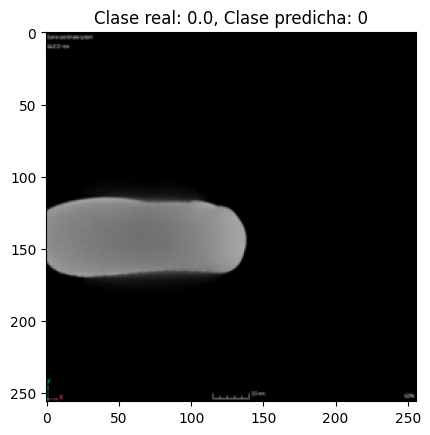

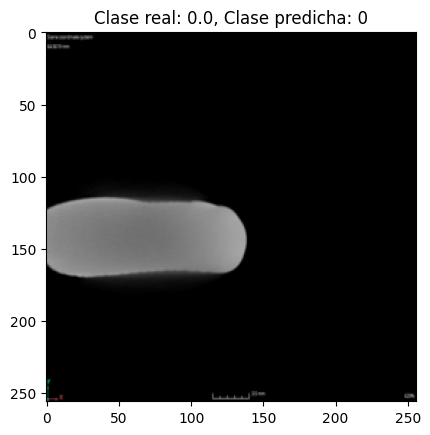

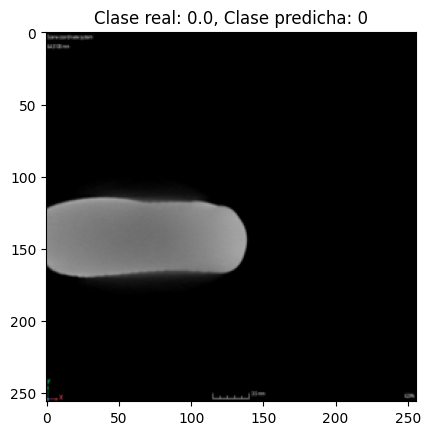

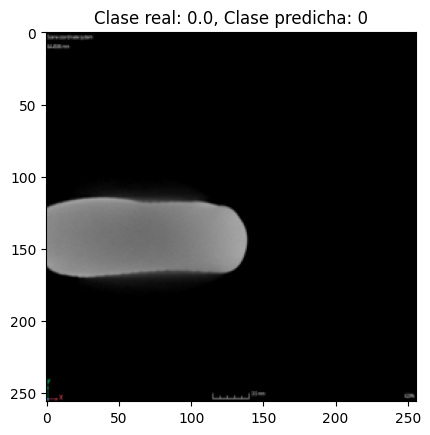

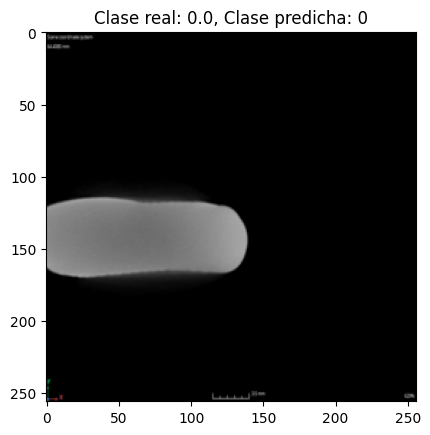

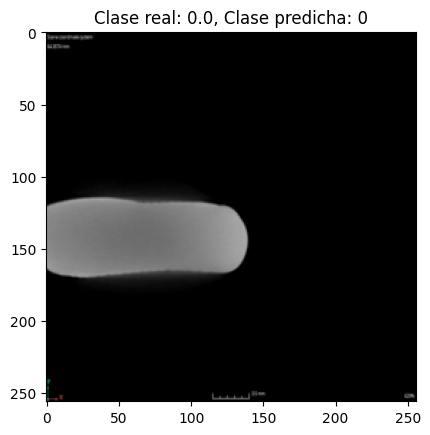

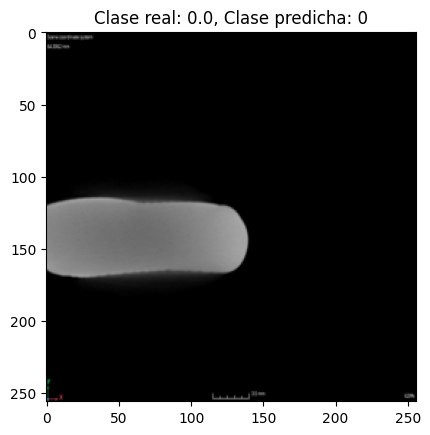

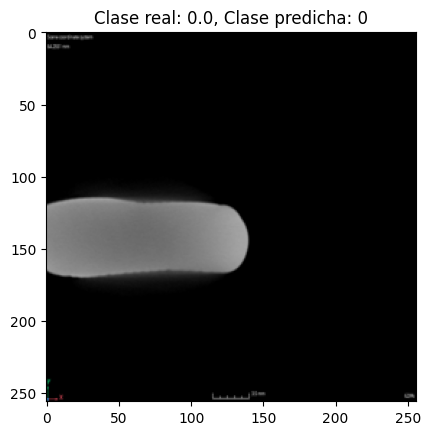

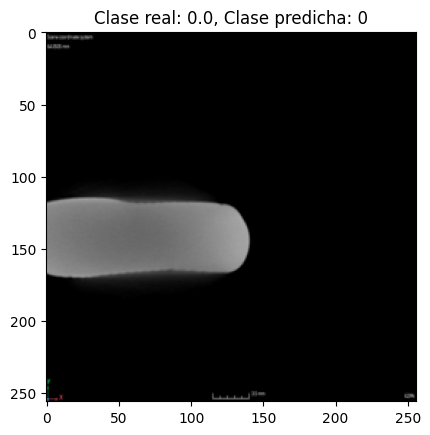

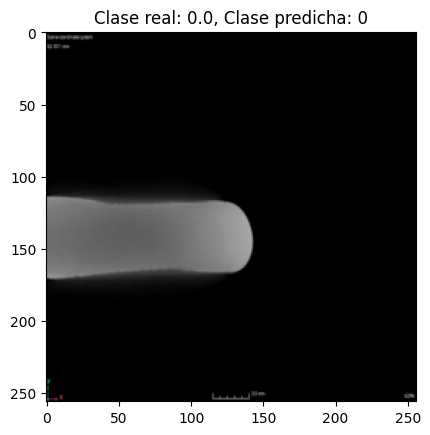

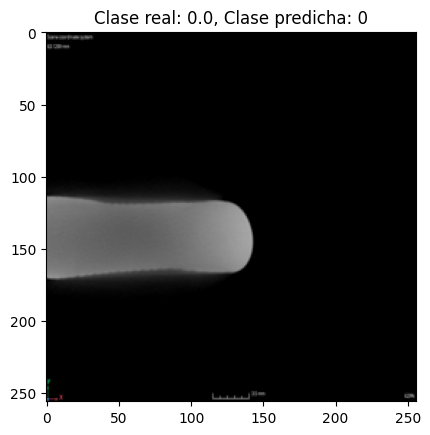

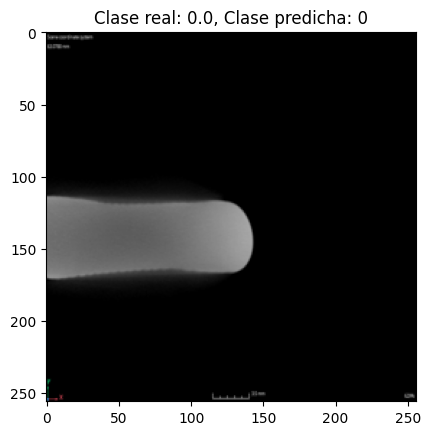

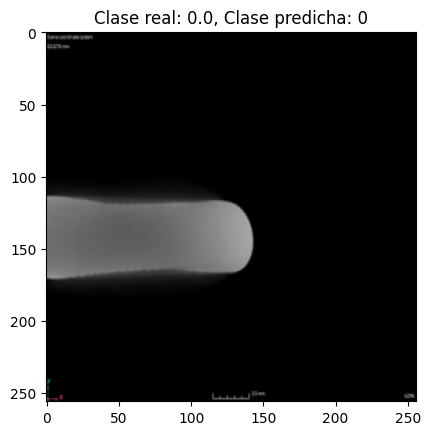

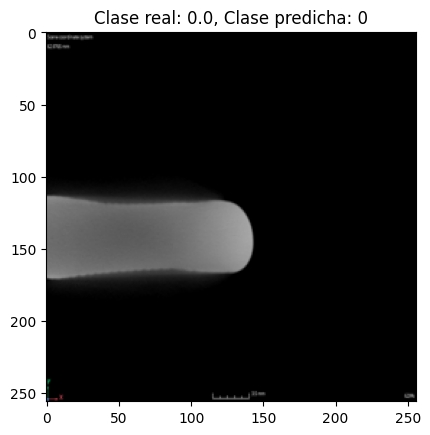

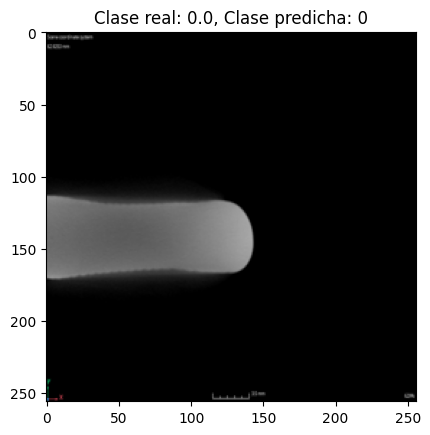

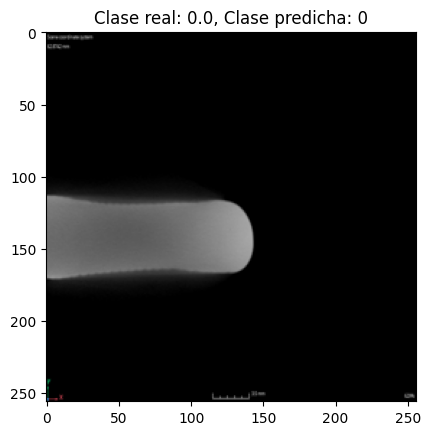

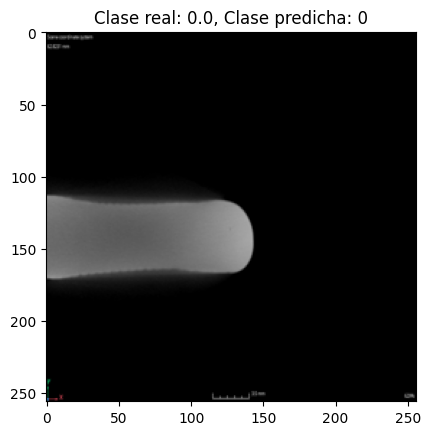

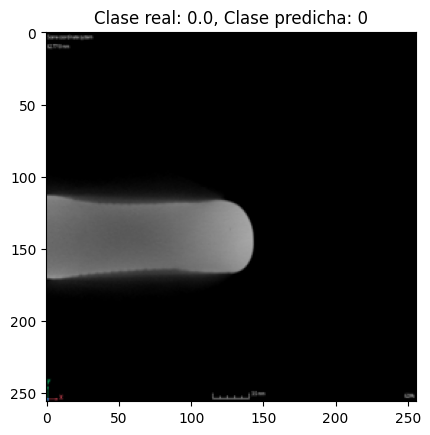

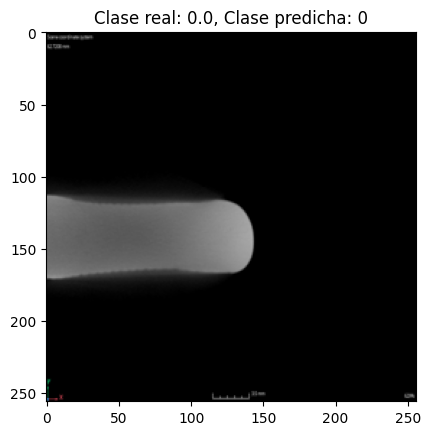

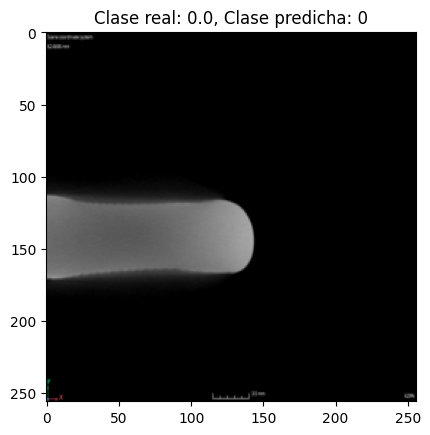

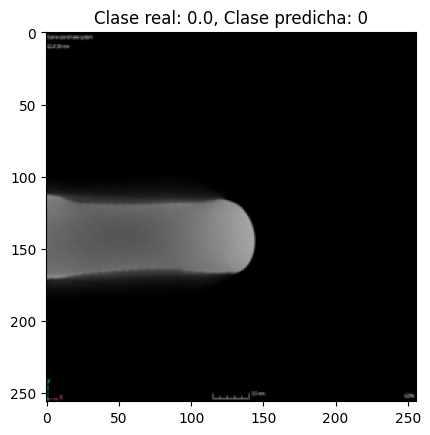

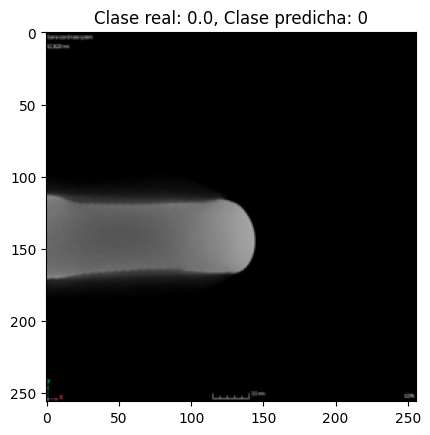

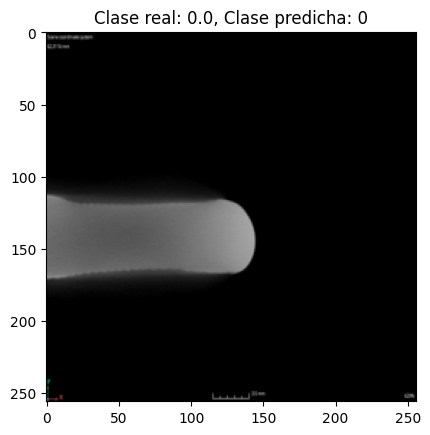

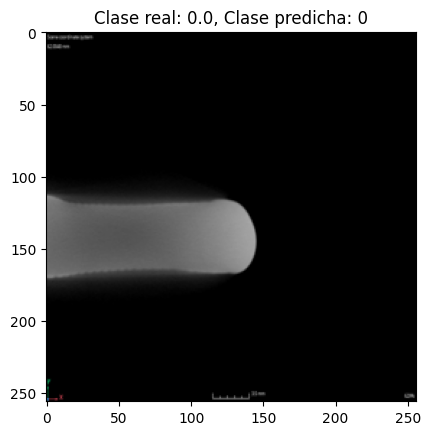

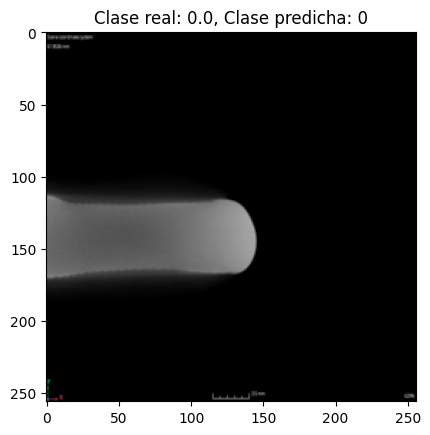

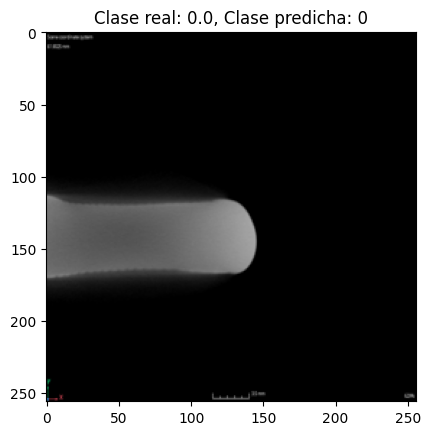

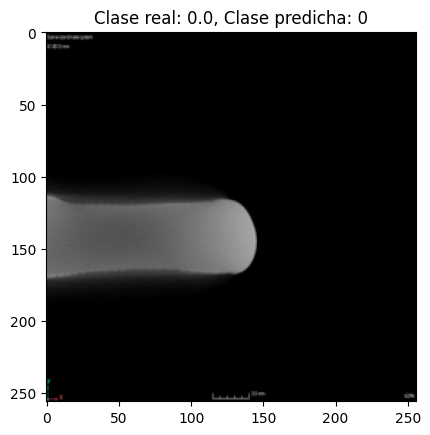

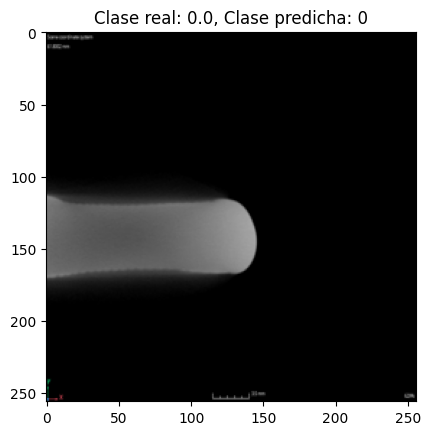

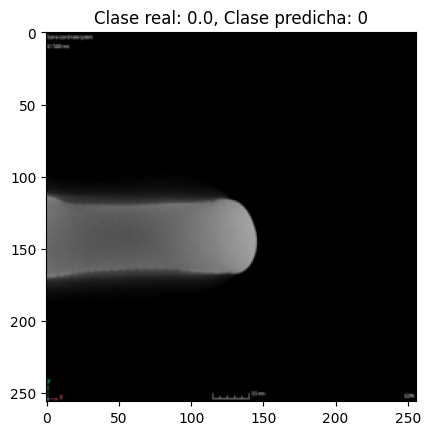

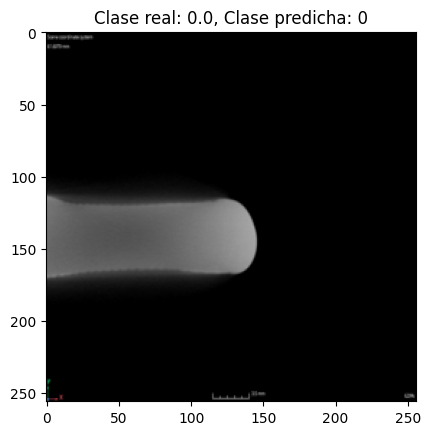

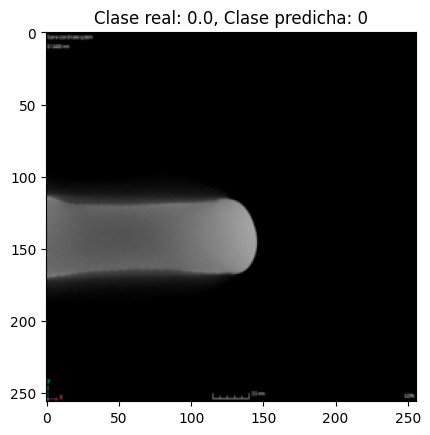

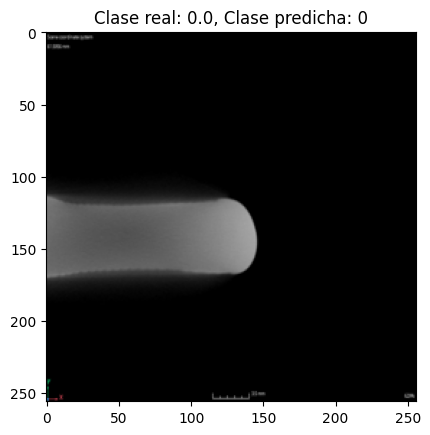

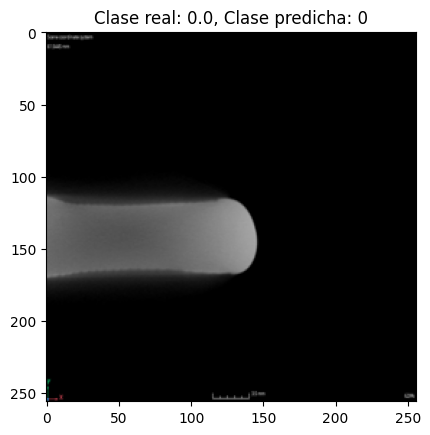

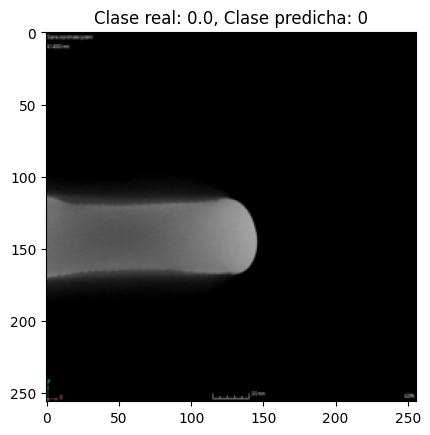

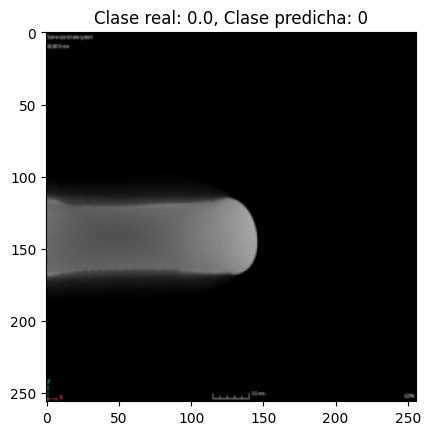

In [9]:
# Hacemos predicciones en los datos de validación
predictions = model.predict(X_val)

# Convertimos las probabilidades a clases binarias (0 o 1)
predicted_classes = (predictions > 0.5).astype(int)

# Mostramos las imágenes con las predicciones y la clase real
for i in range(len(X_val)):
    plt.imshow(X_val[i])
    plt.title(f"Clase real: {y_val[i]}, Clase predicha: {predicted_classes[i][0]}")
    plt.show()

Modelo Probetas

In [52]:
ruta_defectos_PROBETA = r'C:\Users\unidad-epa\Desktop\Iker\Scripts\Clasificados Material 1\Probetas_AIDIMME_clasificadas\Defectos'
ruta_no_defectos_PROBETA = r'C:\Users\unidad-epa\Desktop\Iker\Scripts\Clasificados Material 1\Probetas_AIDIMME_clasificadas\No Defectos'

ruta_defectos_validacion_PROBETA = r'C:\Users\unidad-epa\Desktop\Iker\Scripts\Clasificados Material 1\Probetas_AIDIMME_clasificadas\Defectos Validacion'
ruta_no_defectos_validacion_PROBETA = r'C:\Users\unidad-epa\Desktop\Iker\Scripts\Clasificados Material 1\Probetas_AIDIMME_clasificadas\No defectos Validacion'

image_size = (512, 512)

probeta_defectos = procesar_imagenes(ruta_defectos_PROBETA, image_size)
probeta_no_defectos = procesar_imagenes(ruta_no_defectos_PROBETA, image_size)

probeta_validacion_defectos = procesar_imagenes(ruta_defectos_validacion_PROBETA, image_size)
probeta_validacion_no_defectos = procesar_imagenes(ruta_no_defectos_validacion_PROBETA, image_size)

#probeta_boides_ruidosos_sin_defectos = procesar_imagenes(r'C:\Users\unidad-epa\Desktop\Iker\Scripts\Clasificados Material 1\Probetas_AIDIMME_clasificadas\Bordes, posible ruido por plataforma', (256, 256))

In [ ]:
# probeta_no_defectos = np.concatenate((probeta_no_defectos, probeta_boirdes_ruidosos_sin_defectos), axis=0)

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 512 and the array at index 1 has size 256

In [53]:
print('tamaño entrenamiento defectos', probeta_defectos.shape)
print('tamaño entrenamiento no defectos', probeta_no_defectos.shape)
print('tamaño validacion defectos', probeta_validacion_defectos.shape)
print('tamaño validacion no defectos', probeta_validacion_no_defectos.shape)



tamaño entrenamiento defectos (332, 512, 512, 3)
tamaño entrenamiento no defectos (1124, 512, 512, 3)
tamaño validacion defectos (191, 512, 512, 3)
tamaño validacion no defectos (179, 512, 512, 3)


Las clases no están balanceadas. Vamos a aplicar un balanceo.

In [54]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Supón que probeta_defectos tiene menos imágenes que probeta_no_defectos
num_defectos = probeta_defectos.shape[0]
num_no_defectos = probeta_no_defectos.shape[0]

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Calcula cuántas imágenes necesitas generar
num_to_generate = num_no_defectos - num_defectos

# Genera imágenes aumentadas
augmented_images = []
for batch in datagen.flow(probeta_defectos, batch_size=1):
    augmented_images.append(batch[0])
    if len(augmented_images) >= num_to_generate:
        break
    # Une las imágenes originales y las aumentadas
probeta_defectos_oversampled = np.concatenate([probeta_defectos, np.array(augmented_images)], axis=0)

In [ ]:
# Vamos a generar las etiquetas y el array con todas las imágenes

X=np.concatenate((probeta_defectos_oversampled, probeta_no_defectos), axis=0)


X_val = np.concatenate((probeta_validacion_defectos, probeta_validacion_no_defectos), axis=0)


y = np.concatenate((np.zeros(probeta_defectos_oversampled.shape[0]), np.ones(probeta_no_defectos.shape[0])), axis=0)
y_val = np.concatenate((np.zeros(probeta_validacion_defectos.shape[0]), np.ones(probeta_validacion_no_defectos.shape[0])), axis=0)

In [ ]:
# Probamos sin oversam,pling, a ver si ese es el fallo

X=np.concatenate((probeta_defectos, probeta_no_defectos), axis=0)


X_val = np.concatenate((probeta_validacion_defectos, probeta_validacion_no_defectos), axis=0)


y = np.concatenate((np.zeros(probeta_defectos.shape[0]), np.ones(probeta_no_defectos.shape[0])), axis=0)
y_val = np.concatenate((np.zeros(probeta_validacion_defectos.shape[0]), np.ones(probeta_validacion_no_defectos.shape[0])), axis=0)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

Priemr modelo, solo con los datos de las probetas

In [43]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

train_generator = datagen.flow(X, y, batch_size=32, shuffle=True)

In [57]:
# Definimos la arquitectura del modelo

model=Sequential()
model.add(Conv2D(32,(2,2),activation='relu',input_shape=(512, 512, 3))) #lo mismo habría que toquetear el parámetro filters(32 no es mala para empezar), el padding(seguramente no sea necesario), el kernel size(4x4 pa empezar) y el shape de los datos que van a la red. Mirar de nuevo cuando tengamos más datos
model.add(MaxPooling2D((2,2)))
model.add(Dropout(rate=0.3))
model.add(Conv2D(64,(2,2),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(rate=0.3))

model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(1,activation='sigmoid'))

# Compilamos el modelo

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history=model.fit(X, y, batch_size=32, epochs=100, validation_data=(X_val, y_val), callbacks=[EarlyStopping(monitor='val_accuracy',patience=3, restore_best_weights=True)])

c:\Users\unidad-epa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 55s 764ms/step - accuracy: 0.7860 - loss: 2.2146 - val_accuracy: 0.0135 - val_loss: 2.1946
Epoch 2/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 53s 750ms/step - accuracy: 0.9705 - loss: 0.0795 - val_accuracy: 0.0324 - val_loss: 2.6574
Epoch 3/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 53s 744ms/step - accuracy: 0.9863 - loss: 0.0565 - val_accuracy: 0.0162 - val_loss: 3.2547
Epoch 4/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 53s 745ms/step - accuracy: 0.9691 - loss: 0.0902 - val_accuracy: 0.0351 - val_loss: 3.4629
Epoch 5/100
 4/71 ━━━━━━━━━━━━━━━━━━━━ 49s 735ms/step - accuracy: 0.9909 - loss: 0.0302

KeyboardInterrupt: 

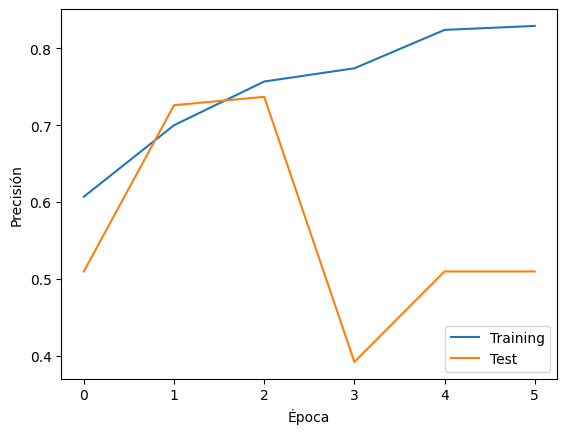

In [26]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend(['Training', 'Test'], loc='lower right')

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


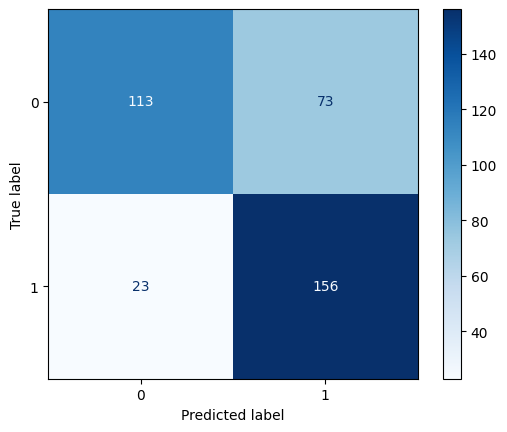

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Obtener predicciones binarias
predictions = model.predict(X_val)
predicted_classes = (predictions > 0.5).astype(int).flatten()

# Calcular la matriz de confusión
cm = confusion_matrix(y_val, predicted_classes)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()